# 데이터 불러오기

In [1]:
### 필요한 라이브러리 임폴트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from keras.optimizers import Adam
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

In [6]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [7]:
plt.rc('font', family='NanumBarunGothic')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/KDT/본 프로젝트'

Mounted at /content/drive
/content/drive/MyDrive/KDT/본 프로젝트


In [5]:
### pandas read_csv()함수를 이용, 데이터 셋 생성하기
df = pd.read_csv('0727_Seoul_preprocessed.csv', encoding = 'cp949', index_col=0)

# 결과 확인
print(df.head())
print('='*100)
print(df.tail())
print('='*100)
print(df.info())

   기준_년_코드  기준_분기_코드   자치구    행정동  대분류    상권_코드    중분류         업종명  총_점포수  \
0     2022         1  서대문구  북가좌2동  서비스  2110499     의료         한의원      1   
1     2022         1   노원구   공릉1동   소매  2110433  의류/잡화          안경      1   
2     2022         1   마포구   성산1동   소매  2110548   전자기기  컴퓨터및주변장치판매      4   
3     2022         1   은평구    대조동  서비스  2110481     미용       피부관리실      3   
4     2022         1  영등포구   신길6동  서비스  2110804     교육        예술학원      5   

   점포_수  ...  개업_점포_수  폐업_률  폐업_점포_수  프랜차이즈_점포_수   총_매출_금액  분기당_매출_금액  \
0     1  ...        0     0        0           0  54003138   54003138   
1     1  ...        0     0        0           0  16150022   16150022   
2     4  ...        0     0        0           0  89813767   89813767   
3     3  ...        1     0        0           0   4619842    4619842   
4     5  ...        0     0        0           0   5946480    5946480   

   주중_매출_금액  주말_매출_금액  남성_매출_금액  여성_매출_금액  
0  35504845  18498293   8791373  45211765  
1  1467465

In [8]:
# 이런저런 전처리

# 컬럼명 바꾸기
df = df.rename(columns = {'남성_매출_금액' : '남성매출금액',
                          '여성_매출_금액' : '여성매출금액',
                          '점포_수' : '점포수',
                          '총_점포수' : '총 점포수',
                          '개업_점포_수' : '개업점포수',
                          '폐업_점포_수' : '폐업점포수',
                          '프랜차이즈_점포_수' : '프랜차이즈 수',
                          '개업_율' : '개업률',
                          '폐업_률' : '폐업률'})

# df에 분기, 상반기/하반기 추가
df['분기'] = df['기준_년_코드'].astype(str) + '-' + df['기준_분기_코드'].astype(str)
df['반기'] = df['기준_분기_코드'].map({1:'상반기', 2:'상반기', 3:'하반기', 4:'하반기'})
df['반기'] = df['기준_년_코드'].astype(str) + ' ' + df['반기']

df.columns

Index(['기준_년_코드', '기준_분기_코드', '자치구', '행정동', '대분류', '상권_코드', '중분류', '업종명',
       '총 점포수', '점포수', '순점포증감률', '개업률', '개업점포수', '폐업률', '폐업점포수', '프랜차이즈 수',
       '총_매출_금액', '분기당_매출_금액', '주중_매출_금액', '주말_매출_금액', '남성매출금액', '여성매출금액',
       '분기', '반기'],
      dtype='object')

In [9]:
# 분기별 내림차순 정렬
df = df.sort_values(by=['기준_년_코드', '기준_분기_코드'], ascending=True).reset_index().drop('index', axis=1)
# df

In [10]:
# 압구정동만 남김
df_ap = df[df.행정동=='압구정동'].reset_index().drop('index', axis=1)

# df_ap

In [11]:
# 분기별 업종별 매출금액 합치기

df_ap_quarter = df_ap.groupby(['분기', '대분류', '중분류', '업종명', '행정동'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()

# 가구

In [12]:
# 가구만 남기기
ap_gagu = df_ap_quarter[df_ap_quarter.업종명 == '가구'].reset_index().drop('index', axis=1)
ap_gagu

,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수
0,2017-1,소매,가구/인테리어,가구,압구정동,6277320652,55,0,3
1,2017-2,소매,가구/인테리어,가구,압구정동,4269784029,56,2,1
2,2017-3,소매,가구/인테리어,가구,압구정동,4288335967,56,0,0
3,2017-4,소매,가구/인테리어,가구,압구정동,4989452376,54,0,2
4,2018-1,소매,가구/인테리어,가구,압구정동,6425441657,52,0,2
5,2018-2,소매,가구/인테리어,가구,압구정동,3695328692,50,0,2
6,2018-3,소매,가구/인테리어,가구,압구정동,4628161608,51,1,0
7,2018-4,소매,가구/인테리어,가구,압구정동,7819603581,52,2,1
8,2019-1,소매,가구/인테리어,가구,압구정동,1532977916,46,0,0
9,2019-2,소매,가구/인테리어,가구,압구정동,1562245201,48,2,0


## 지표 만들기 : 성장성, 순점포증감률, 시장성

In [13]:
# 기초구역 단위별 선택 업종의 전분기 대비 당기의 매출 증감률을 비교하여 성장 정도를 판단
# 성장성 = 당기 매출액 / 전분기 매출액

# 성장성 추가
# shift() 사용. 참고 : https://seong6496.tistory.com/216

ap_gagu['성장성'] = ap_gagu['분기당_매출_금액'] / ap_gagu['분기당_매출_금액'].shift(1)
# 성장성이 1 이하면 지난분기 대비 이번분기 매출이 줄어든 것. 1 이상이어야 해당 분기 매출 상승.


# # 17년도 1분기 성장성 값은 1로 임의로 정한다. 구할 수가 없어서...
ap_gagu['성장성'][0] = 1

ap_gagu

<ipython-input-13-bbdbbe726934>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_gagu['성장성'][0] = 1


,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수,성장성
0,2017-1,소매,가구/인테리어,가구,압구정동,6277320652,55,0,3,1.000000
1,2017-2,소매,가구/인테리어,가구,압구정동,4269784029,56,2,1,0.680192
2,2017-3,소매,가구/인테리어,가구,압구정동,4288335967,56,0,0,1.004345
3,2017-4,소매,가구/인테리어,가구,압구정동,4989452376,54,0,2,1.163494
4,2018-1,소매,가구/인테리어,가구,압구정동,6425441657,52,0,2,1.287805
5,2018-2,소매,가구/인테리어,가구,압구정동,3695328692,50,0,2,0.575109
6,2018-3,소매,가구/인테리어,가구,압구정동,4628161608,51,1,0,1.252436
7,2018-4,소매,가구/인테리어,가구,압구정동,7819603581,52,2,1,1.689570
8,2019-1,소매,가구/인테리어,가구,압구정동,1532977916,46,0,0,0.196043
9,2019-2,소매,가구/인테리어,가구,압구정동,1562245201,48,2,0,1.019092


In [14]:
# 개업률, 폐업률, 순점포증감률 추가

ap_gagu['개업률'] = (ap_gagu['개업점포수'] / ap_gagu['총 점포수']) * 100
ap_gagu['폐업률'] = (ap_gagu['폐업점포수'] / ap_gagu['총 점포수']) * 100
ap_gagu['순점포증감률'] = ((ap_gagu['개업점포수'] - ap_gagu['폐업점포수']) / ap_gagu['총 점포수']) * 100

ap_gagu

,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수,성장성,개업률,폐업률,순점포증감률
0,2017-1,소매,가구/인테리어,가구,압구정동,6277320652,55,0,3,1.000000,0.000000,5.454545,-5.454545
1,2017-2,소매,가구/인테리어,가구,압구정동,4269784029,56,2,1,0.680192,3.571429,1.785714,1.785714
2,2017-3,소매,가구/인테리어,가구,압구정동,4288335967,56,0,0,1.004345,0.000000,0.000000,0.000000
3,2017-4,소매,가구/인테리어,가구,압구정동,4989452376,54,0,2,1.163494,0.000000,3.703704,-3.703704
4,2018-1,소매,가구/인테리어,가구,압구정동,6425441657,52,0,2,1.287805,0.000000,3.846154,-3.846154
5,2018-2,소매,가구/인테리어,가구,압구정동,3695328692,50,0,2,0.575109,0.000000,4.000000,-4.000000
6,2018-3,소매,가구/인테리어,가구,압구정동,4628161608,51,1,0,1.252436,1.960784,0.000000,1.960784
7,2018-4,소매,가구/인테리어,가구,압구정동,7819603581,52,2,1,1.689570,3.846154,1.923077,1.923077
8,2019-1,소매,가구/인테리어,가구,압구정동,1532977916,46,0,0,0.196043,0.000000,0.000000,0.000000
9,2019-2,소매,가구/인테리어,가구,압구정동,1562245201,48,2,0,1.019092,4.166667,0.000000,4.166667


In [15]:
# 시장성 추가
# 기초구역 단위별 점포당 평균 매출을 시군구의 평균 매출과 비교하여 시군구 평균 대비 시장성을 판단
# 시장성 = (행정동 내 분기 매출액 / 분기 점포수) - (자치구 내 분기 매출액 / 분기 점포수)



################################################################################################################################################################################################

# 자치구 평균 매출을 구하기 위해, 원본 데이터로 잠깐 작업하겠습니다
df_gangnam = df[df['자치구'] == '강남구']

# 자치구 분기별 업종별 매출금액 합치기
df_gangnam_quarter = df_gangnam.groupby(['분기', '자치구', '대분류', '중분류', '업종명'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()

# 가구만 남기기
gangnam_gagu = df_gangnam_quarter[df_gangnam_quarter['업종명'] == '가구'].reset_index()

################################################################################################################################################################################################

ap_gagu['시장성'] = (ap_gagu['분기당_매출_금액'] / ap_gagu['총 점포수']) - (gangnam_gagu['분기당_매출_금액'] / gangnam_gagu['총 점포수'])

ap_gagu = ap_gagu[['분기', '업종명','분기당_매출_금액', '성장성', '순점포증감률', '시장성']]
ap_gagu

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,가구,6277320652,1.000000,-5.454545,-7.009935e+07
1,2017-2,가구,4269784029,0.680192,1.785714,-7.703522e+07
2,2017-3,가구,4288335967,1.004345,0.000000,-9.839173e+07
3,2017-4,가구,4989452376,1.163494,-3.703704,-7.144215e+07
4,2018-1,가구,6425441657,1.287805,-3.846154,-5.315206e+07
5,2018-2,가구,3695328692,0.575109,-4.000000,-1.246837e+08
6,2018-3,가구,4628161608,1.252436,1.960784,-9.097976e+07
7,2018-4,가구,7819603581,1.689570,1.923077,-6.281442e+07
8,2019-1,가구,1532977916,0.196043,0.000000,-1.208744e+08
9,2019-2,가구,1562245201,1.019092,4.166667,-1.060086e+08


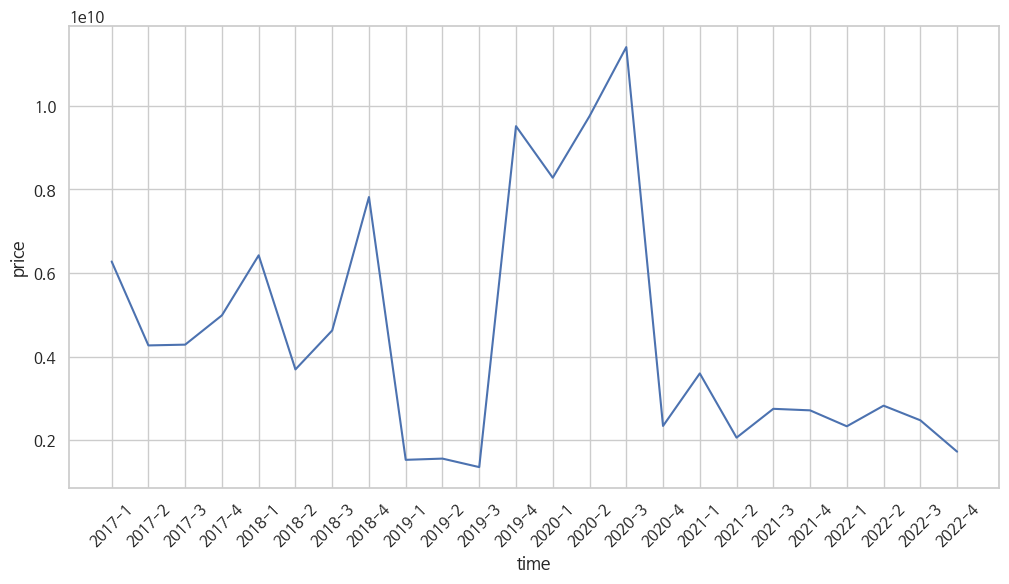

In [16]:
### seaborn lineplot을 이용, 전체 매출 시각화

# 시각화에 필요한 matplotlib.pyplot, seaborn 라이브러리 임폴트
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화
sns.set(style="whitegrid", color_codes=True, font='NanumBarunGothic')

plt.figure(figsize=(12, 6))
sns.lineplot(x=ap_gagu['분기'], y=ap_gagu['분기당_매출_금액'])
plt.xlabel('time')
plt.xticks(rotation=45)
plt.ylabel('price')
plt.show()

## 23년 1분기 매출 예측

In [17]:
# 총 매출액을 예측하기 위한 지표로는 성장성, 안정성, 시장성, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = ap_gagu[['성장성', '시장성', '순점포증감률']]
y = ap_gagu.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -7.009935e+07 -5.454545
1   0.680192 -7.703522e+07  1.785714
2   1.004345 -9.839173e+07  0.000000
3   1.163494 -7.144215e+07 -3.703704
4   1.287805 -5.315206e+07 -3.846154
5   0.575109 -1.246837e+08 -4.000000
6   1.252436 -9.097976e+07  1.960784
7   1.689570 -6.281442e+07  1.923077
8   0.196043 -1.208744e+08  0.000000
9   1.019092 -1.060086e+08  4.166667
10  0.869839 -1.164994e+08 -2.127660
11  7.001633 -1.113737e+08  3.508772
12  0.870375 -8.855938e+07 -1.818182
13  1.177801 -1.406001e+08  0.000000
14  1.169389 -8.215074e+07 -3.773585
15  0.205449 -2.471592e+08  1.886792
16  1.536136 -2.119174e+08 -1.923077
17  0.573335 -2.546140e+08  3.703704
18  1.334017 -2.204614e+08  6.818182
19  0.986732 -2.456652e+08  3.389831
20  0.859576 -1.815395e+08 -1.724138
21  1.211305 -2.181266e+08  0.000000
22  0.876303 -1.609844e+08 -1.754386
23  0.697310 -1.815298e+08  0.000000
---------------------------------------------------------------------------

In [18]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [19]:
### 시계열 분석에 적합한 데이터를 만들어 주는 함수 정의
def make_dataset(X, y, window_size=10):
    X_data = []
    y_data = []
    for start in np.arange(len(X) - window_size):
        stop = start + window_size
        X_data.append(X[start:stop, :])
        y_data.append(y[stop])
    return np.array(X_data), np.array(y_data)




### 시계열 분석에서 마지막 테스트 데이터를 만들어 주는 함수 정의
def make_last_dataset(X, window_size=10):
    X_data_last = []
    for start in np.arange(len(X) - window_size +1):
        stop = start + window_size
        X_data_last.append(X[start:stop, :])
    return X_data_last[-1]

In [20]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [21]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.09995605 0.46475074 0.30149448]
 [0.07365514 0.36276956 0.44444444]]


In [22]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [23]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
# model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2, 64)             17408     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [24]:
### 모델 학습

# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.1956
Epoch 1: val_loss improved from inf to 0.31006, saving model to stock_model.h5
1/1 [==============================] - 9s 9s/step - loss: 0.1956 - val_loss: 0.3101
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.1947
Epoch 2: val_loss improved from 0.31006 to 0.30907, saving model to stock_model.h5
1/1 [==============================] - 0s 72ms/step - loss: 0.1947 - val_loss: 0.3091
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.1938
Epoch 3: val_loss improved from 0.30907 to 0.30808, saving model to stock_model.h5
1/1 [==============================] - 0s 81ms/step - loss: 0.1938 - val_loss: 0.3081
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.1929
Epoch 4: val_loss improved from 0.30808 to 0.30710, saving model to stock_model.h5
1/1 [==============================] - 0s 70ms/step - loss: 0.1929 - val_loss: 0.3071
Epoch 5/300
1/1 [=================

In [25]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 920ms/step
[[0.2535343 ]
 [0.22061259]
 [0.22144027]
 [0.22095259]]


In [26]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_gagu.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.097167,0.253534
2022-2,0.146279,0.220613
2022-3,0.111454,0.221440
2022-4,0.036777,0.220953


In [27]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_gagu.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_gagu의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.097167,0.253534,2335130304,3.906132e+09,-1.571002e+09
2022-2,0.146279,0.220613,2828554625,3.575371e+09,-7.468166e+08
2022-3,0.111454,0.221440,2478670406,3.583687e+09,-1.105017e+09
2022-4,0.036777,0.220953,1728400623,3.578787e+09,-1.850386e+09


In [28]:
df_test = df_test.reset_index()

### 결과

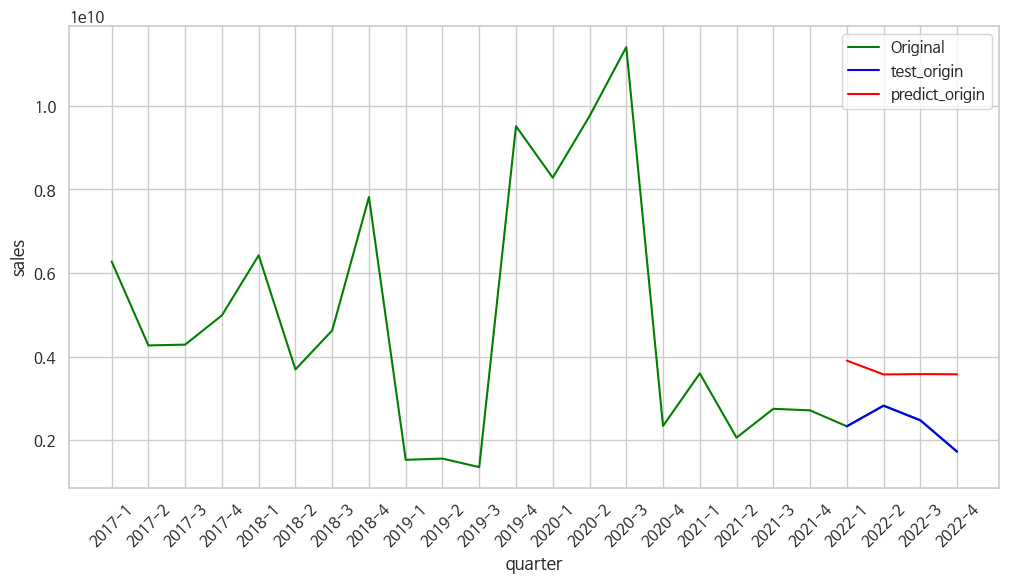

In [29]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_gagu['분기'], ap_gagu['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [30]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean    -1.318305e+09
std      4.895771e+08
min     -1.850386e+09
25%     -1.640848e+09
50%     -1.338009e+09
75%     -1.015467e+09
max     -7.468166e+08
dtype: float64

In [31]:
### 23년 1분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 28ms/step
[[0.24069561]]
--------------------------------------------------------------------------------
예측된 매출  : 3777143040.0 


## 23년 1분기 성장성 예측

In [32]:
# 성장을 예측하기 위한 지표로는 성장성, 안정성, 시장성, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = ap_gagu[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_gagu.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

      분기당_매출_금액           시장성    순점포증감률
0    6277320652 -7.009935e+07 -5.454545
1    4269784029 -7.703522e+07  1.785714
2    4288335967 -9.839173e+07  0.000000
3    4989452376 -7.144215e+07 -3.703704
4    6425441657 -5.315206e+07 -3.846154
5    3695328692 -1.246837e+08 -4.000000
6    4628161608 -9.097976e+07  1.960784
7    7819603581 -6.281442e+07  1.923077
8    1532977916 -1.208744e+08  0.000000
9    1562245201 -1.060086e+08  4.166667
10   1358902251 -1.164994e+08 -2.127660
11   9514534604 -1.113737e+08  3.508772
12   8281213280 -8.855938e+07 -1.818182
13   9753625257 -1.406001e+08  0.000000
14  11405785772 -8.215074e+07 -3.773585
15   2343303442 -2.471592e+08  1.886792
16   3599632558 -2.119174e+08 -1.923077
17   2063794153 -2.546140e+08  3.703704
18   2753135577 -2.204614e+08  6.818182
19   2716606456 -2.456652e+08  3.389831
20   2335130304 -1.815395e+08 -1.724138
21   2828554625 -2.181266e+08  0.000000
22   2478670406 -1.609844e+08 -1.754386
23   1728400623 -1.815298e+08  0.000000


In [33]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [34]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [35]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.11145428 0.46475074 0.30149448]
 [0.03677741 0.36276956 0.44444444]]


In [36]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [37]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [38]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.1328
Epoch 1: val_loss improved from inf to 0.02330, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.1328 - val_loss: 0.0233
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.1322
Epoch 2: val_loss improved from 0.02330 to 0.02299, saving model to stock_model.h5
1/1 [==============================] - 0s 78ms/step - loss: 0.1322 - val_loss: 0.0230
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.1316
Epoch 3: val_loss improved from 0.02299 to 0.02268, saving model to stock_model.h5
1/1 [==============================] - 0s 82ms/step - loss: 0.1316 - val_loss: 0.0227
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.1310
Epoch 4: val_loss improved from 0.02268 to 0.02237, saving model to stock_model.h5
1/1 [==============================] - 0s 73ms/step - loss: 0.1310 - val_loss: 0.0224
Epoch 5/300
1/1 [=================

In [39]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 613ms/step
[[0.1279085 ]
 [0.10821192]
 [0.102615  ]
 [0.10311087]]


In [40]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_gagu.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.097498,0.127908
2022-2,0.149181,0.108212
2022-3,0.099956,0.102615
2022-4,0.073655,0.103111


In [41]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_gagu.iloc[-len(pred):, 3].values       # 성장성이 ap_gagu의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.097498,0.127908,0.859576,1.066536,-0.206959
2022-2,0.149181,0.108212,1.211305,0.932489,0.278816
2022-3,0.099956,0.102615,0.876303,0.894399,-0.018096
2022-4,0.073655,0.103111,0.697310,0.897773,-0.200464


### 결과

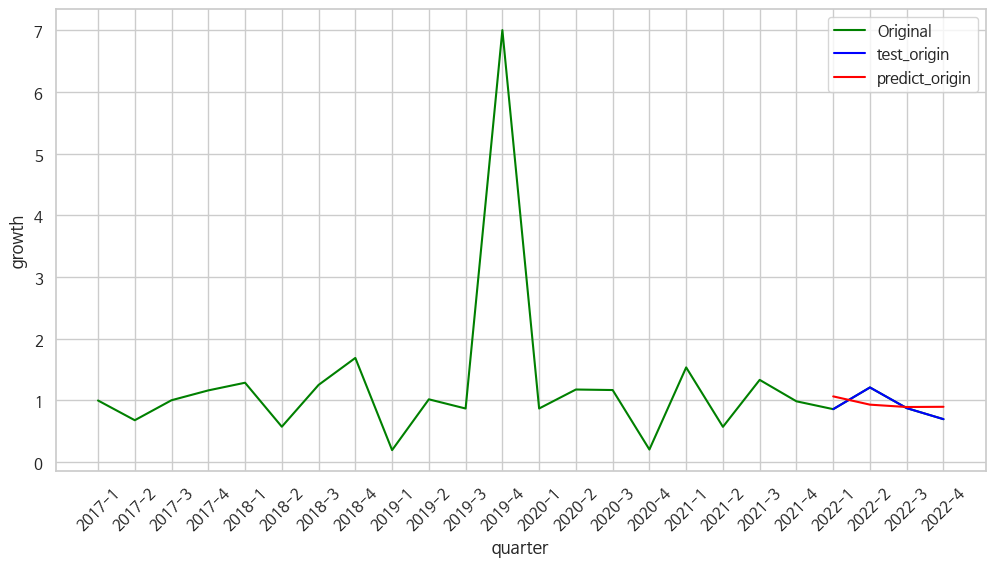

In [42]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_gagu['분기'], ap_gagu['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [43]:
## error의 요약 통계량
error.describe()

count    4.000000
mean    -0.036676
std      0.227818
min     -0.206959
25%     -0.202088
50%     -0.109280
75%      0.056132
max      0.278816
dtype: float64

In [44]:
### 23년 1분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 19ms/step
[[0.10869327]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.9357647895812988 


## 23년 1분기 시장성 예측

In [45]:
# 시장성을 예측하기 위한 지표로는 성장성, 안정성, 총매출, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = ap_gagu[['성장성', '분기당_매출_금액', '순점포증감률']]
y = ap_gagu.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성    분기당_매출_금액    순점포증감률
0   1.000000   6277320652 -5.454545
1   0.680192   4269784029  1.785714
2   1.004345   4288335967  0.000000
3   1.163494   4989452376 -3.703704
4   1.287805   6425441657 -3.846154
5   0.575109   3695328692 -4.000000
6   1.252436   4628161608  1.960784
7   1.689570   7819603581  1.923077
8   0.196043   1532977916  0.000000
9   1.019092   1562245201  4.166667
10  0.869839   1358902251 -2.127660
11  7.001633   9514534604  3.508772
12  0.870375   8281213280 -1.818182
13  1.177801   9753625257  0.000000
14  1.169389  11405785772 -3.773585
15  0.205449   2343303442  1.886792
16  1.536136   3599632558 -1.923077
17  0.573335   2063794153  3.703704
18  1.334017   2753135577  6.818182
19  0.986732   2716606456  3.389831
20  0.859576   2335130304 -1.724138
21  1.211305   2828554625  0.000000
22  0.876303   2478670406 -1.754386
23  0.697310   1728400623  0.000000
--------------------------------------------------------------------------------
             시장성
0 

In [46]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [47]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [48]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.09995605 0.11145428 0.30149448]
 [0.07365514 0.03677741 0.44444444]]


In [49]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [50]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [51]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.6641
Epoch 1: val_loss improved from inf to 0.24604, saving model to stock_model.h5
1/1 [==============================] - 3s 3s/step - loss: 0.6641 - val_loss: 0.2460
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.6626
Epoch 2: val_loss improved from 0.24604 to 0.24522, saving model to stock_model.h5
1/1 [==============================] - 0s 80ms/step - loss: 0.6626 - val_loss: 0.2452
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.6611
Epoch 3: val_loss improved from 0.24522 to 0.24441, saving model to stock_model.h5
1/1 [==============================] - 0s 75ms/step - loss: 0.6611 - val_loss: 0.2444
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.6596
Epoch 4: val_loss improved from 0.24441 to 0.24360, saving model to stock_model.h5
1/1 [==============================] - 0s 77ms/step - loss: 0.6596 - val_loss: 0.2436
Epoch 5/300
1/1 [=================

In [52]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 646ms/step
[[0.41513526]
 [0.32501915]
 [0.26715595]
 [0.28220892]]


In [53]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_gagu.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.362721,0.415135
2022-2,0.181113,0.325019
2022-3,0.464751,0.267156
2022-4,0.362770,0.282209


In [54]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_gagu.iloc[-len(pred):, 5].values       # 시장성이 ap_gagu의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.362721,0.415135,-1.815395e+08,-170980064.0,-1.055940e+07
2022-2,0.181113,0.325019,-2.181266e+08,-189135040.0,-2.899153e+07
2022-3,0.464751,0.267156,-1.609844e+08,-200792272.0,3.980784e+07
2022-4,0.362770,0.282209,-1.815298e+08,-197759664.0,1.622990e+07


### 결과

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


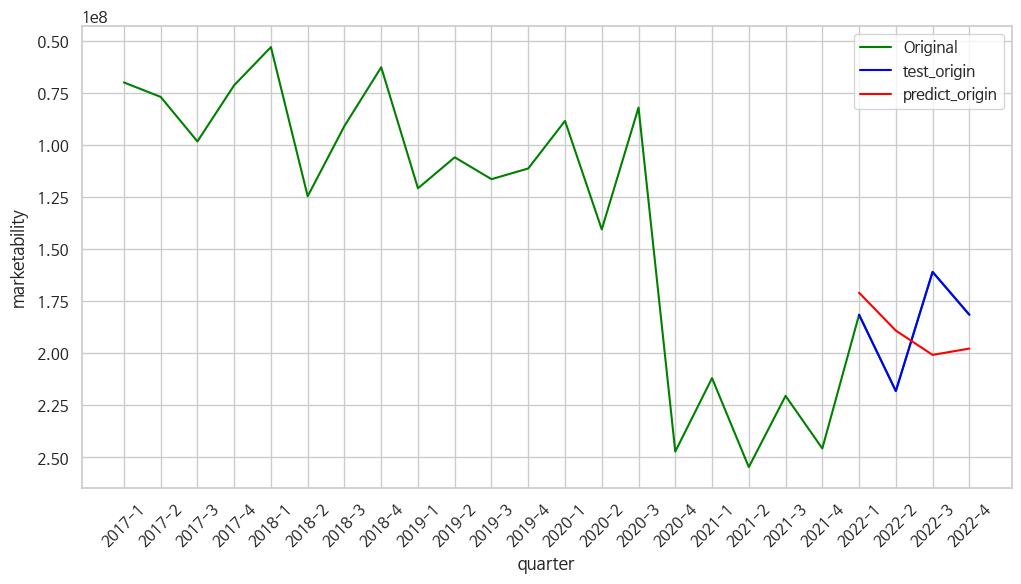

In [55]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_gagu['분기'], ap_gagu['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [56]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     4.121705e+06
std      3.017797e+07
min     -2.899153e+07
25%     -1.516743e+07
50%      2.835253e+06
75%      2.212439e+07
max      3.980784e+07
dtype: float64

In [57]:
### 23년 1분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 20ms/step
[[0.2623336]]
--------------------------------------------------------------------------------
예측된 시장성  : -201763776.0 


## 23년 1분기 순점포증감률 예측

In [58]:
# 순점포증감률을 예측하기 위한 지표로는 성장성, 총매출, 시장성 선정

### X / y 데이터 생성
X = ap_gagu[['성장성', '분기당_매출_금액', '시장성']]
y = ap_gagu.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성    분기당_매출_금액           시장성
0   1.000000   6277320652 -7.009935e+07
1   0.680192   4269784029 -7.703522e+07
2   1.004345   4288335967 -9.839173e+07
3   1.163494   4989452376 -7.144215e+07
4   1.287805   6425441657 -5.315206e+07
5   0.575109   3695328692 -1.246837e+08
6   1.252436   4628161608 -9.097976e+07
7   1.689570   7819603581 -6.281442e+07
8   0.196043   1532977916 -1.208744e+08
9   1.019092   1562245201 -1.060086e+08
10  0.869839   1358902251 -1.164994e+08
11  7.001633   9514534604 -1.113737e+08
12  0.870375   8281213280 -8.855938e+07
13  1.177801   9753625257 -1.406001e+08
14  1.169389  11405785772 -8.215074e+07
15  0.205449   2343303442 -2.471592e+08
16  1.536136   3599632558 -2.119174e+08
17  0.573335   2063794153 -2.546140e+08
18  1.334017   2753135577 -2.204614e+08
19  0.986732   2716606456 -2.456652e+08
20  0.859576   2335130304 -1.815395e+08
21  1.211305   2828554625 -2.181266e+08
22  0.876303   2478670406 -1.609844e+08
23  0.697310   1728400623 -1.815298e+08


In [59]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [60]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [61]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.09995605 0.11145428 0.46475074]
 [0.07365514 0.03677741 0.36276956]]


In [62]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [63]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [64]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2572
Epoch 1: val_loss improved from inf to 0.37349, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.2572 - val_loss: 0.3735
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2561
Epoch 2: val_loss improved from 0.37349 to 0.37247, saving model to stock_model.h5
1/1 [==============================] - 0s 75ms/step - loss: 0.2561 - val_loss: 0.3725
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2550
Epoch 3: val_loss improved from 0.37247 to 0.37144, saving model to stock_model.h5
1/1 [==============================] - 0s 73ms/step - loss: 0.2550 - val_loss: 0.3714
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2539
Epoch 4: val_loss improved from 0.37144 to 0.37042, saving model to stock_model.h5
1/1 [==============================] - 0s 94ms/step - loss: 0.2539 - val_loss: 0.3704
Epoch 5/300
1/1 [=================

In [65]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 619ms/step
[[0.21975057]
 [0.21977599]
 [0.25928333]
 [0.25547388]]


In [66]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_gagu.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.303959,0.219751
2022-2,0.444444,0.219776
2022-3,0.301494,0.259283
2022-4,0.444444,0.255474


In [67]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_gagu.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_gagu의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.303959,0.219751,-1.724138,-2.757607,1.033469
2022-2,0.444444,0.219776,0.000000,-2.757295,2.757295
2022-3,0.301494,0.259283,-1.754386,-2.272432,0.518046
2022-4,0.444444,0.255474,0.000000,-2.319184,2.319184


### 결과

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


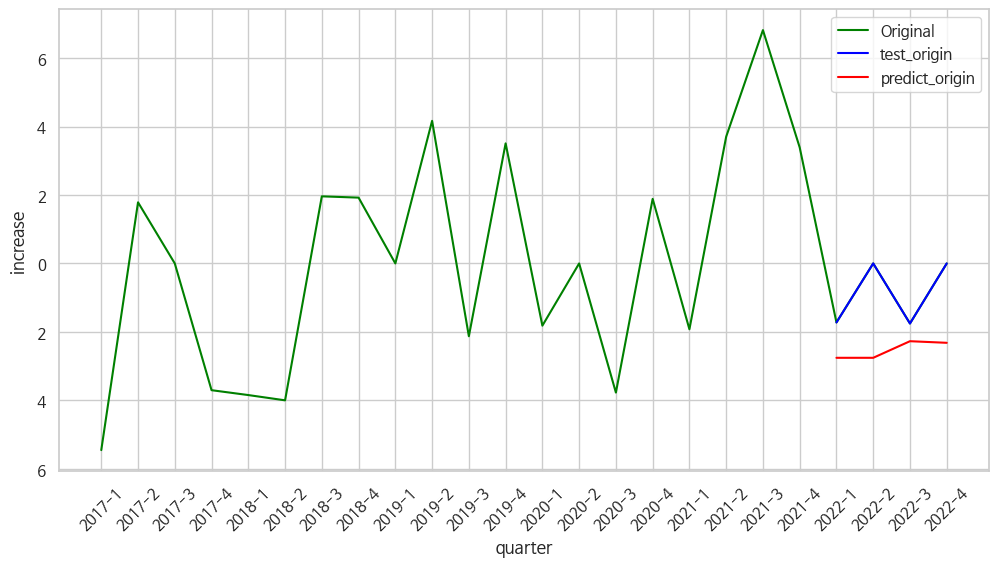

In [68]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_gagu['분기'], ap_gagu['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [69]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     1.656998
std      1.054379
min      0.518046
25%      0.904613
50%      1.676327
75%      2.428712
max      2.757295
dtype: float64

In [70]:
### 23년 1분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 21ms/step
[[0.28978592]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -1.89808189868927 


## 원본 데이터에 예측값 추가하기

In [71]:
print(sales)
print(growth)
print(marketability)
print(increase)

3777143000.0
0.9357648
-201763780.0
-1.8980819


In [72]:
ap_gagu.loc[24] = ['2023-1', 'etability]ㅈ', sales, growth, increase, marketability]

<ipython-input-72-eea0abe55dfb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_gagu.loc[24] = ['2023-1', 'etability]ㅈ', sales, growth, increase, marketability]


In [73]:
ap_gagu

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,가구,6.277321e+09,1.000000,-5.454545,-7.009935e+07
1,2017-2,가구,4.269784e+09,0.680192,1.785714,-7.703522e+07
2,2017-3,가구,4.288336e+09,1.004345,0.000000,-9.839173e+07
3,2017-4,가구,4.989452e+09,1.163494,-3.703704,-7.144215e+07
4,2018-1,가구,6.425442e+09,1.287805,-3.846154,-5.315206e+07
5,2018-2,가구,3.695329e+09,0.575109,-4.000000,-1.246837e+08
6,2018-3,가구,4.628162e+09,1.252436,1.960784,-9.097976e+07
7,2018-4,가구,7.819604e+09,1.689570,1.923077,-6.281442e+07
8,2019-1,가구,1.532978e+09,0.196043,0.000000,-1.208744e+08
9,2019-2,가구,1.562245e+09,1.019092,4.166667,-1.060086e+08


## 23년 2분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본 데이터에 추가

### 매출

In [74]:
### X / y 데이터 생성
X = ap_gagu[['성장성', '시장성', '순점포증감률']]
y = ap_gagu.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -7.009935e+07 -5.454545
1   0.680192 -7.703522e+07  1.785714
2   1.004345 -9.839173e+07  0.000000
3   1.163494 -7.144215e+07 -3.703704
4   1.287805 -5.315206e+07 -3.846154
5   0.575109 -1.246837e+08 -4.000000
6   1.252436 -9.097976e+07  1.960784
7   1.689570 -6.281442e+07  1.923077
8   0.196043 -1.208744e+08  0.000000
9   1.019092 -1.060086e+08  4.166667
10  0.869839 -1.164994e+08 -2.127660
11  7.001633 -1.113737e+08  3.508772
12  0.870375 -8.855938e+07 -1.818182
13  1.177801 -1.406001e+08  0.000000
14  1.169389 -8.215074e+07 -3.773585
15  0.205449 -2.471592e+08  1.886792
16  1.536136 -2.119174e+08 -1.923077
17  0.573335 -2.546140e+08  3.703704
18  1.334017 -2.204614e+08  6.818182
19  0.986732 -2.456652e+08  3.389831
20  0.859576 -1.815395e+08 -1.724138
21  1.211305 -2.181266e+08  0.000000
22  0.876303 -1.609844e+08 -1.754386
23  0.697310 -1.815298e+08  0.000000
24  0.935765 -2.017638e+08 -1.898082
--------------------------------------

In [75]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [76]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.07365514 0.36276956 0.44444444]
 [0.10869328 0.26233366 0.28978592]]


In [77]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [78]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_9 (LSTM)               (None, 32)                12416     
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [79]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2255
Epoch 1: val_loss improved from inf to 0.24622, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.2255 - val_loss: 0.2462
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2245
Epoch 2: val_loss improved from 0.24622 to 0.24541, saving model to stock_model.h5
1/1 [==============================] - 0s 73ms/step - loss: 0.2245 - val_loss: 0.2454
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2235
Epoch 3: val_loss improved from 0.24541 to 0.24460, saving model to stock_model.h5
1/1 [==============================] - 0s 78ms/step - loss: 0.2235 - val_loss: 0.2446
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2226
Epoch 4: val_loss improved from 0.24460 to 0.24380, saving model to stock_model.h5
1/1 [==============================] - 0s 76ms/step - loss: 0.2226 - val_loss: 0.2438
Epoch 5/300
1/1 [=================

In [80]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 604ms/step
[[0.24137977]
 [0.24352293]
 [0.24307366]
 [0.26413578]]


In [81]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_gagu.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.146279,0.241380
2022-3,0.111454,0.243523
2022-4,0.036777,0.243074
2023-1,0.240696,0.264136


In [82]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_gagu.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_gagu의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.146279,0.241380,2.828555e+09,3.784017e+09,-9.554623e+08
2022-3,0.111454,0.243523,2.478670e+09,3.805549e+09,-1.326878e+09
2022-4,0.036777,0.243074,1.728401e+09,3.801035e+09,-2.072634e+09
2023-1,0.240696,0.264136,3.777143e+09,4.012644e+09,-2.355008e+08


In [83]:
df_test = df_test.reset_index()

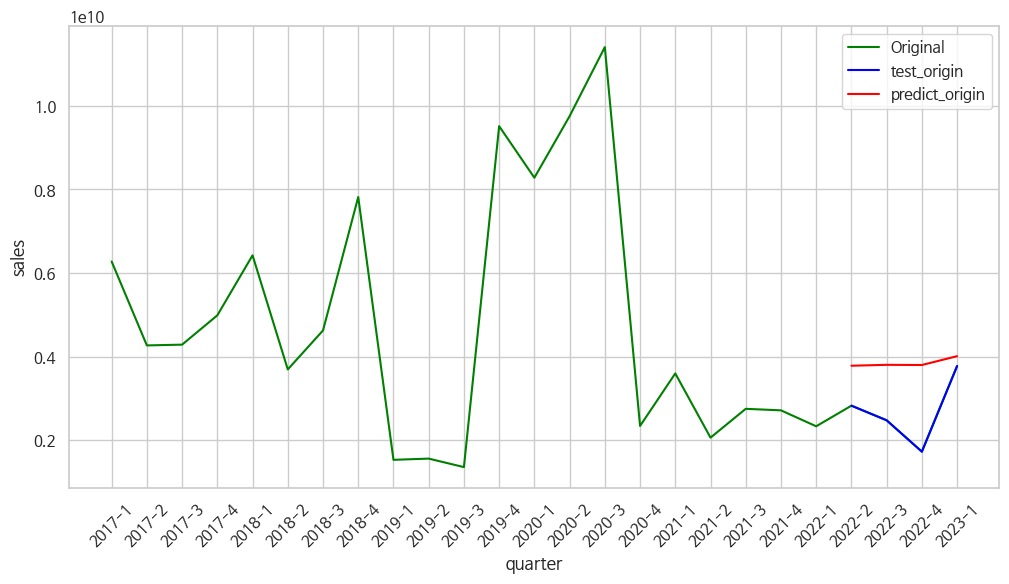

In [84]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_gagu['분기'], ap_gagu['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [85]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean    -1.147619e+09
std      7.652170e+08
min     -2.072634e+09
25%     -1.513317e+09
50%     -1.141170e+09
75%     -7.754719e+08
max     -2.355008e+08
dtype: float64

In [86]:
### 23년 2분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 20ms/step
[[0.25112]]
--------------------------------------------------------------------------------
예측된 매출  : 3881875712.0 


### 성장성

In [87]:
### X / y 데이터 생성
X = ap_gagu[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_gagu.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성    순점포증감률
0   6.277321e+09 -7.009935e+07 -5.454545
1   4.269784e+09 -7.703522e+07  1.785714
2   4.288336e+09 -9.839173e+07  0.000000
3   4.989452e+09 -7.144215e+07 -3.703704
4   6.425442e+09 -5.315206e+07 -3.846154
5   3.695329e+09 -1.246837e+08 -4.000000
6   4.628162e+09 -9.097976e+07  1.960784
7   7.819604e+09 -6.281442e+07  1.923077
8   1.532978e+09 -1.208744e+08  0.000000
9   1.562245e+09 -1.060086e+08  4.166667
10  1.358902e+09 -1.164994e+08 -2.127660
11  9.514535e+09 -1.113737e+08  3.508772
12  8.281213e+09 -8.855938e+07 -1.818182
13  9.753625e+09 -1.406001e+08  0.000000
14  1.140579e+10 -8.215074e+07 -3.773585
15  2.343303e+09 -2.471592e+08  1.886792
16  3.599633e+09 -2.119174e+08 -1.923077
17  2.063794e+09 -2.546140e+08  3.703704
18  2.753136e+09 -2.204614e+08  6.818182
19  2.716606e+09 -2.456652e+08  3.389831
20  2.335130e+09 -1.815395e+08 -1.724138
21  2.828555e+09 -2.181266e+08  0.000000
22  2.478670e+09 -1.609844e+08 -1.754386
23  1.728401e+09

In [88]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [89]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.03677741 0.36276956 0.44444444]
 [0.24069561 0.26233366 0.28978592]]


In [90]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [91]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_11 (LSTM)              (None, 32)                12416     
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [92]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.1224
Epoch 1: val_loss improved from inf to 0.02264, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.1224 - val_loss: 0.0226
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.1218
Epoch 2: val_loss improved from 0.02264 to 0.02235, saving model to stock_model.h5
1/1 [==============================] - 0s 71ms/step - loss: 0.1218 - val_loss: 0.0223
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.1212
Epoch 3: val_loss improved from 0.02235 to 0.02205, saving model to stock_model.h5
1/1 [==============================] - 0s 72ms/step - loss: 0.1212 - val_loss: 0.0220
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.1206
Epoch 4: val_loss improved from 0.02205 to 0.02176, saving model to stock_model.h5
1/1 [==============================] - 0s 83ms/step - loss: 0.1206 - val_loss: 0.0218
Epoch 5/300
1/1 [=================

In [93]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 600ms/step
[[0.10771659]
 [0.10209736]
 [0.10259067]
 [0.10813088]]


In [94]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_gagu.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.149181,0.107717
2022-3,0.099956,0.102097
2022-4,0.073655,0.102591
2023-1,0.108693,0.108131


In [95]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_gagu.iloc[-len(pred):, 3].values       # 성장성이 ap_gagu의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.149181,0.107717,1.211305,0.929118,0.282187
2022-3,0.099956,0.102097,0.876303,0.890876,-0.014573
2022-4,0.073655,0.102591,0.697310,0.894233,-0.196923
2023-1,0.108693,0.108131,0.935765,0.931937,0.003827


In [96]:
df_test = df_test.reset_index()

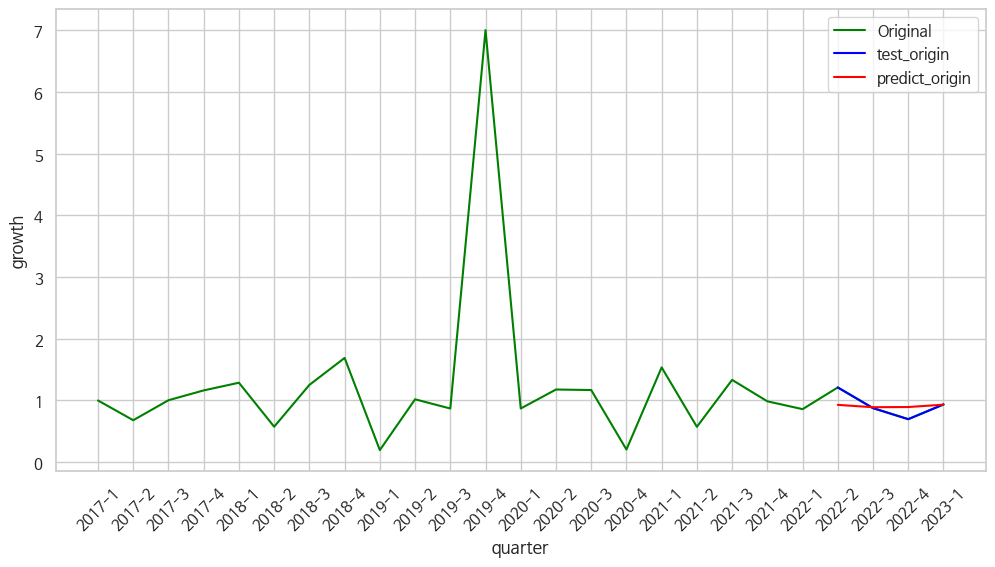

In [97]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_gagu['분기'], ap_gagu['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [98]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     0.018630
std      0.197693
min     -0.196923
25%     -0.060160
50%     -0.005373
75%      0.073417
max      0.282187
dtype: float64

In [99]:
### 23년 2분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 19ms/step
[[0.10513815]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.9115700721740723 


### 시장성

In [100]:
### X / y 데이터 생성
X = ap_gagu[['분기당_매출_금액', '성장성', '순점포증감률']]
y = ap_gagu.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성    순점포증감률
0   6.277321e+09  1.000000 -5.454545
1   4.269784e+09  0.680192  1.785714
2   4.288336e+09  1.004345  0.000000
3   4.989452e+09  1.163494 -3.703704
4   6.425442e+09  1.287805 -3.846154
5   3.695329e+09  0.575109 -4.000000
6   4.628162e+09  1.252436  1.960784
7   7.819604e+09  1.689570  1.923077
8   1.532978e+09  0.196043  0.000000
9   1.562245e+09  1.019092  4.166667
10  1.358902e+09  0.869839 -2.127660
11  9.514535e+09  7.001633  3.508772
12  8.281213e+09  0.870375 -1.818182
13  9.753625e+09  1.177801  0.000000
14  1.140579e+10  1.169389 -3.773585
15  2.343303e+09  0.205449  1.886792
16  3.599633e+09  1.536136 -1.923077
17  2.063794e+09  0.573335  3.703704
18  2.753136e+09  1.334017  6.818182
19  2.716606e+09  0.986732  3.389831
20  2.335130e+09  0.859576 -1.724138
21  2.828555e+09  1.211305  0.000000
22  2.478670e+09  0.876303 -1.754386
23  1.728401e+09  0.697310  0.000000
24  3.777143e+09  0.935765 -1.898082
--------------------------------------

In [101]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [102]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.03677741 0.07365514 0.44444444]
 [0.24069561 0.10869328 0.28978592]]


In [103]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [104]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_13 (LSTM)              (None, 32)                12416     
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [105]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.6603
Epoch 1: val_loss improved from inf to 0.16823, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.6603 - val_loss: 0.1682
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.6588
Epoch 2: val_loss improved from 0.16823 to 0.16755, saving model to stock_model.h5
1/1 [==============================] - 0s 73ms/step - loss: 0.6588 - val_loss: 0.1676
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.6573
Epoch 3: val_loss improved from 0.16755 to 0.16688, saving model to stock_model.h5
1/1 [==============================] - 0s 75ms/step - loss: 0.6573 - val_loss: 0.1669
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.6558
Epoch 4: val_loss improved from 0.16688 to 0.16621, saving model to stock_model.h5
1/1 [==============================] - 0s 94ms/step - loss: 0.6558 - val_loss: 0.1662
Epoch 5/300
1/1 [=================

In [106]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 645ms/step
[[0.2642569 ]
 [0.21844676]
 [0.22987771]
 [0.21458104]]


In [107]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_gagu.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.181113,0.264257
2022-3,0.464751,0.218447
2022-4,0.362770,0.229878
2023-1,0.262334,0.214581


In [108]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_gagu.iloc[-len(pred):, 5].values       # 시장성이 ap_gagu의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.181113,0.264257,-2.181266e+08,-201376320.0,-1.675025e+07
2022-3,0.464751,0.218447,-1.609844e+08,-210605328.0,4.962090e+07
2022-4,0.362770,0.229878,-1.815298e+08,-208302416.0,2.677266e+07
2023-1,0.262334,0.214581,-2.017638e+08,-211384112.0,9.620336e+06


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


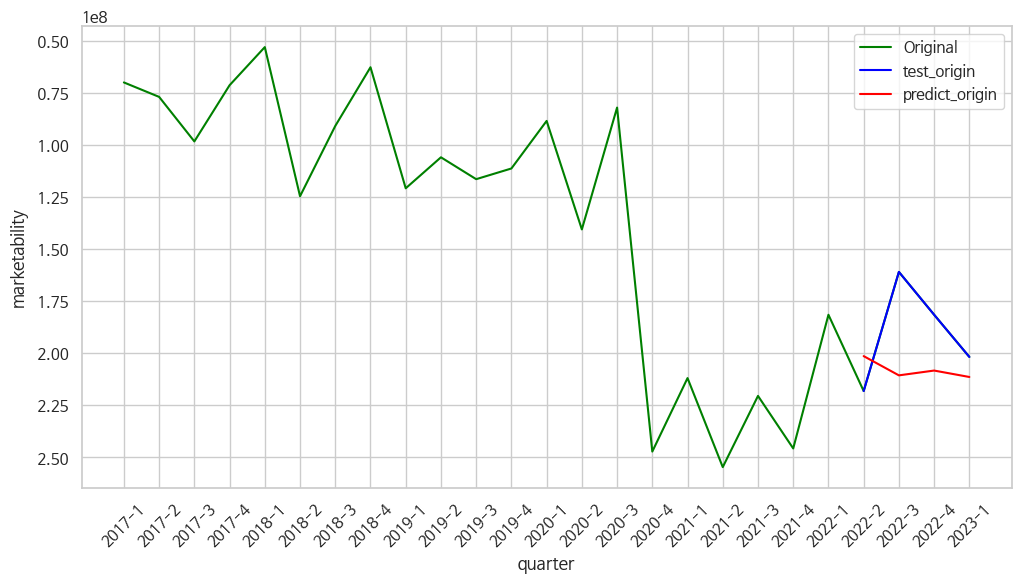

In [109]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_gagu['분기'], ap_gagu['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [110]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     1.731591e+07
std      2.800457e+07
min     -1.675025e+07
25%      3.027690e+06
50%      1.819650e+07
75%      3.248472e+07
max      4.962090e+07
dtype: float64

In [111]:
### 23년 2분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 22ms/step
[[0.22434276]]
--------------------------------------------------------------------------------
예측된 시장성  : -209417504.0 


### 순점포증감률

In [112]:
### X / y 데이터 생성
X = ap_gagu[['분기당_매출_금액', '성장성', '시장성']]
y = ap_gagu.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   6.277321e+09  1.000000 -7.009935e+07
1   4.269784e+09  0.680192 -7.703522e+07
2   4.288336e+09  1.004345 -9.839173e+07
3   4.989452e+09  1.163494 -7.144215e+07
4   6.425442e+09  1.287805 -5.315206e+07
5   3.695329e+09  0.575109 -1.246837e+08
6   4.628162e+09  1.252436 -9.097976e+07
7   7.819604e+09  1.689570 -6.281442e+07
8   1.532978e+09  0.196043 -1.208744e+08
9   1.562245e+09  1.019092 -1.060086e+08
10  1.358902e+09  0.869839 -1.164994e+08
11  9.514535e+09  7.001633 -1.113737e+08
12  8.281213e+09  0.870375 -8.855938e+07
13  9.753625e+09  1.177801 -1.406001e+08
14  1.140579e+10  1.169389 -8.215074e+07
15  2.343303e+09  0.205449 -2.471592e+08
16  3.599633e+09  1.536136 -2.119174e+08
17  2.063794e+09  0.573335 -2.546140e+08
18  2.753136e+09  1.334017 -2.204614e+08
19  2.716606e+09  0.986732 -2.456652e+08
20  2.335130e+09  0.859576 -1.815395e+08
21  2.828555e+09  1.211305 -2.181266e+08
22  2.478670e+09  0.876303 -1.609844e+08
23  1.728401e+09

In [113]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [114]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.03677741 0.07365514 0.36276956]
 [0.24069561 0.10869328 0.26233366]]


In [115]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [116]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_15 (LSTM)              (None, 32)                12416     
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [117]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2387
Epoch 1: val_loss improved from inf to 0.36585, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.2387 - val_loss: 0.3659
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2377
Epoch 2: val_loss improved from 0.36585 to 0.36488, saving model to stock_model.h5
1/1 [==============================] - 0s 107ms/step - loss: 0.2377 - val_loss: 0.3649
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2366
Epoch 3: val_loss improved from 0.36488 to 0.36391, saving model to stock_model.h5
1/1 [==============================] - 0s 119ms/step - loss: 0.2366 - val_loss: 0.3639
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2356
Epoch 4: val_loss improved from 0.36391 to 0.36295, saving model to stock_model.h5
1/1 [==============================] - 0s 126ms/step - loss: 0.2356 - val_loss: 0.3629
Epoch 5/300
1/1 [==============

In [118]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 632ms/step
[[0.21077514]
 [0.24756931]
 [0.24373879]
 [0.2768976 ]]


In [119]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_gagu.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.444444,0.210775
2022-3,0.301494,0.247569
2022-4,0.444444,0.243739
2023-1,0.289786,0.276898


In [120]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_gagu.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_gagu의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.444444,0.210775,0.000000,-2.867760,2.867760
2022-3,0.301494,0.247569,-1.754386,-2.416195,0.661809
2022-4,0.444444,0.243739,0.000000,-2.463206,2.463206
2023-1,0.289786,0.276898,-1.898082,-2.056257,0.158175


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


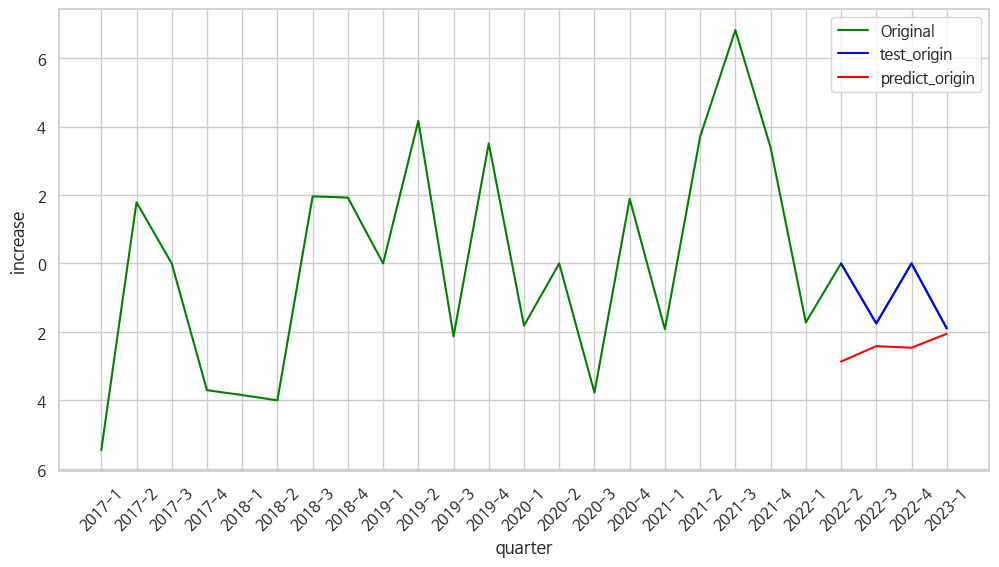

In [121]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_gagu['분기'], ap_gagu['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [122]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     1.537737
std      1.328645
min      0.158175
25%      0.535900
50%      1.562507
75%      2.564344
max      2.867760
dtype: float64

In [123]:
### 23년 2분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 21ms/step
[[0.25206107]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -2.3610687255859375 


### 추가


In [124]:
ap_gagu.loc[25] = ['2023-2', '가구수리리', sales, growth, increase, marketability]

<ipython-input-124-d325a66a8536>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_gagu.loc[25] = ['2023-2', '가구수리리', sales, growth, increase, marketability]


In [125]:
ap_gagu

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,가구,6.277321e+09,1.000000,-5.454545,-7.009935e+07
1,2017-2,가구,4.269784e+09,0.680192,1.785714,-7.703522e+07
2,2017-3,가구,4.288336e+09,1.004345,0.000000,-9.839173e+07
3,2017-4,가구,4.989452e+09,1.163494,-3.703704,-7.144215e+07
4,2018-1,가구,6.425442e+09,1.287805,-3.846154,-5.315206e+07
5,2018-2,가구,3.695329e+09,0.575109,-4.000000,-1.246837e+08
6,2018-3,가구,4.628162e+09,1.252436,1.960784,-9.097976e+07
7,2018-4,가구,7.819604e+09,1.689570,1.923077,-6.281442e+07
8,2019-1,가구,1.532978e+09,0.196043,0.000000,-1.208744e+08
9,2019-2,가구,1.562245e+09,1.019092,4.166667,-1.060086e+08


## 23년 3분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본 데이터에 추가

### 매출

In [126]:
################ 매출 ####################

### X / y 데이터 생성
X = ap_gagu[['성장성', '시장성', '순점포증감률']]
y = ap_gagu.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -7.009935e+07 -5.454545
1   0.680192 -7.703522e+07  1.785714
2   1.004345 -9.839173e+07  0.000000
3   1.163494 -7.144215e+07 -3.703704
4   1.287805 -5.315206e+07 -3.846154
5   0.575109 -1.246837e+08 -4.000000
6   1.252436 -9.097976e+07  1.960784
7   1.689570 -6.281442e+07  1.923077
8   0.196043 -1.208744e+08  0.000000
9   1.019092 -1.060086e+08  4.166667
10  0.869839 -1.164994e+08 -2.127660
11  7.001633 -1.113737e+08  3.508772
12  0.870375 -8.855938e+07 -1.818182
13  1.177801 -1.406001e+08  0.000000
14  1.169389 -8.215074e+07 -3.773585
15  0.205449 -2.471592e+08  1.886792
16  1.536136 -2.119174e+08 -1.923077
17  0.573335 -2.546140e+08  3.703704
18  1.334017 -2.204614e+08  6.818182
19  0.986732 -2.456652e+08  3.389831
20  0.859576 -1.815395e+08 -1.724138
21  1.211305 -2.181266e+08  0.000000
22  0.876303 -1.609844e+08 -1.754386
23  0.697310 -1.815298e+08  0.000000
24  0.935765 -2.017638e+08 -1.898082
25  0.911570 -2.094175e+08 -2.361069
-

In [127]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [128]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.10869328 0.26233366 0.28978592]
 [0.10513815 0.22434273 0.25206107]]


In [129]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [130]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_17 (LSTM)              (None, 32)                12416     
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [131]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2706
Epoch 1: val_loss improved from inf to 0.15386, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.2706 - val_loss: 0.1539
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2695
Epoch 2: val_loss improved from 0.15386 to 0.15331, saving model to stock_model.h5
1/1 [==============================] - 0s 125ms/step - loss: 0.2695 - val_loss: 0.1533
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2684
Epoch 3: val_loss improved from 0.15331 to 0.15277, saving model to stock_model.h5
1/1 [==============================] - 0s 144ms/step - loss: 0.2684 - val_loss: 0.1528
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2673
Epoch 4: val_loss improved from 0.15277 to 0.15222, saving model to stock_model.h5
1/1 [==============================] - 0s 135ms/step - loss: 0.2673 - val_loss: 0.1522
Epoch 5/300
1/1 [==============

In [132]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 900ms/step
[[0.23405288]
 [0.23491576]
 [0.25254336]
 [0.2407401 ]]


In [133]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_gagu.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.111454,0.234053
2022-4,0.036777,0.234916
2023-1,0.240696,0.252543
2023-2,0.251120,0.240740


In [134]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_gagu.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_gagu의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.111454,0.234053,2.478670e+09,3.710404e+09,-1.231734e+09
2022-4,0.036777,0.234916,1.728401e+09,3.719074e+09,-1.990673e+09
2023-1,0.240696,0.252543,3.777143e+09,3.896176e+09,-1.190331e+08
2023-2,0.251120,0.240740,3.881876e+09,3.777590e+09,1.042857e+08


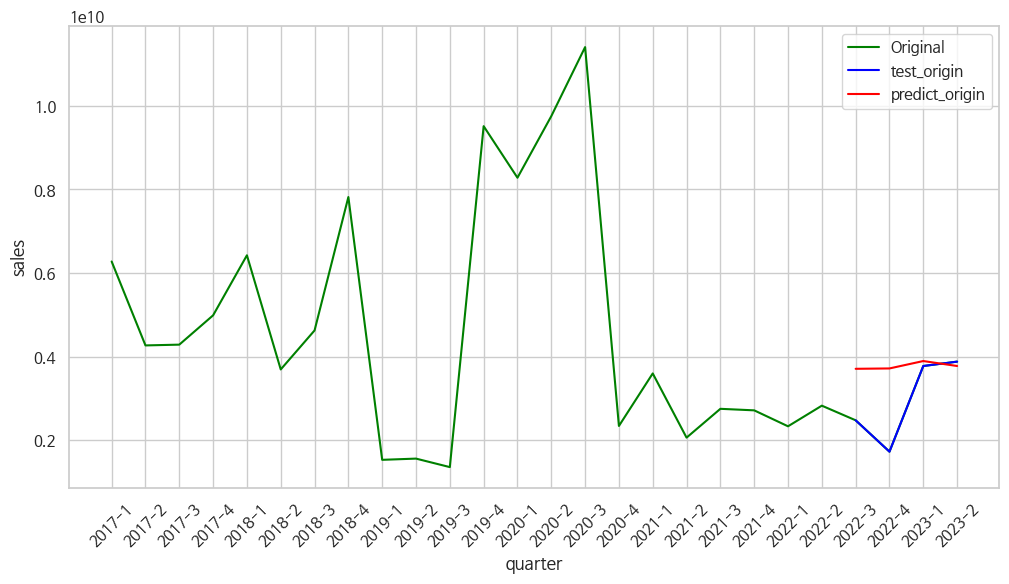

In [135]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_gagu['분기'], ap_gagu['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [136]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean    -8.092886e+08
std      9.806801e+08
min     -1.990673e+09
25%     -1.421469e+09
50%     -6.753835e+08
75%     -6.320339e+07
max      1.042857e+08
dtype: float64

In [137]:
### 23년 3분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 22ms/step
[[0.2158909]]
--------------------------------------------------------------------------------
예측된 매출  : 3527932928.0 


### 성장성

In [138]:
X = ap_gagu[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_gagu.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성    순점포증감률
0   6.277321e+09 -7.009935e+07 -5.454545
1   4.269784e+09 -7.703522e+07  1.785714
2   4.288336e+09 -9.839173e+07  0.000000
3   4.989452e+09 -7.144215e+07 -3.703704
4   6.425442e+09 -5.315206e+07 -3.846154
5   3.695329e+09 -1.246837e+08 -4.000000
6   4.628162e+09 -9.097976e+07  1.960784
7   7.819604e+09 -6.281442e+07  1.923077
8   1.532978e+09 -1.208744e+08  0.000000
9   1.562245e+09 -1.060086e+08  4.166667
10  1.358902e+09 -1.164994e+08 -2.127660
11  9.514535e+09 -1.113737e+08  3.508772
12  8.281213e+09 -8.855938e+07 -1.818182
13  9.753625e+09 -1.406001e+08  0.000000
14  1.140579e+10 -8.215074e+07 -3.773585
15  2.343303e+09 -2.471592e+08  1.886792
16  3.599633e+09 -2.119174e+08 -1.923077
17  2.063794e+09 -2.546140e+08  3.703704
18  2.753136e+09 -2.204614e+08  6.818182
19  2.716606e+09 -2.456652e+08  3.389831
20  2.335130e+09 -1.815395e+08 -1.724138
21  2.828555e+09 -2.181266e+08  0.000000
22  2.478670e+09 -1.609844e+08 -1.754386
23  1.728401e+09

In [139]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [140]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.24069561 0.26233366 0.28978592]
 [0.25112001 0.22434273 0.25206107]]


In [141]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [142]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_19 (LSTM)              (None, 32)                12416     
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [143]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.1150
Epoch 1: val_loss improved from inf to 0.02171, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.1150 - val_loss: 0.0217
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.1145
Epoch 2: val_loss improved from 0.02171 to 0.02144, saving model to stock_model.h5
1/1 [==============================] - 0s 74ms/step - loss: 0.1145 - val_loss: 0.0214
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.1139
Epoch 3: val_loss improved from 0.02144 to 0.02117, saving model to stock_model.h5
1/1 [==============================] - 0s 92ms/step - loss: 0.1139 - val_loss: 0.0212
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.1133
Epoch 4: val_loss improved from 0.02117 to 0.02090, saving model to stock_model.h5
1/1 [==============================] - 0s 78ms/step - loss: 0.1133 - val_loss: 0.0209
Epoch 5/300
1/1 [=================

In [144]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 913ms/step
[[0.10502682]
 [0.1055754 ]
 [0.11131511]
 [0.1082132 ]]


In [145]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_gagu.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.099956,0.105027
2022-4,0.073655,0.105575
2023-1,0.108693,0.111315
2023-2,0.105138,0.108213


In [146]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_gagu.iloc[-len(pred):, 3].values       # 성장성이 ap_gagu의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.099956,0.105027,0.876303,0.910812,-0.034510
2022-4,0.073655,0.105575,0.697310,0.914546,-0.217236
2023-1,0.108693,0.111315,0.935765,0.953608,-0.017843
2023-2,0.105138,0.108213,0.911570,0.932498,-0.020928


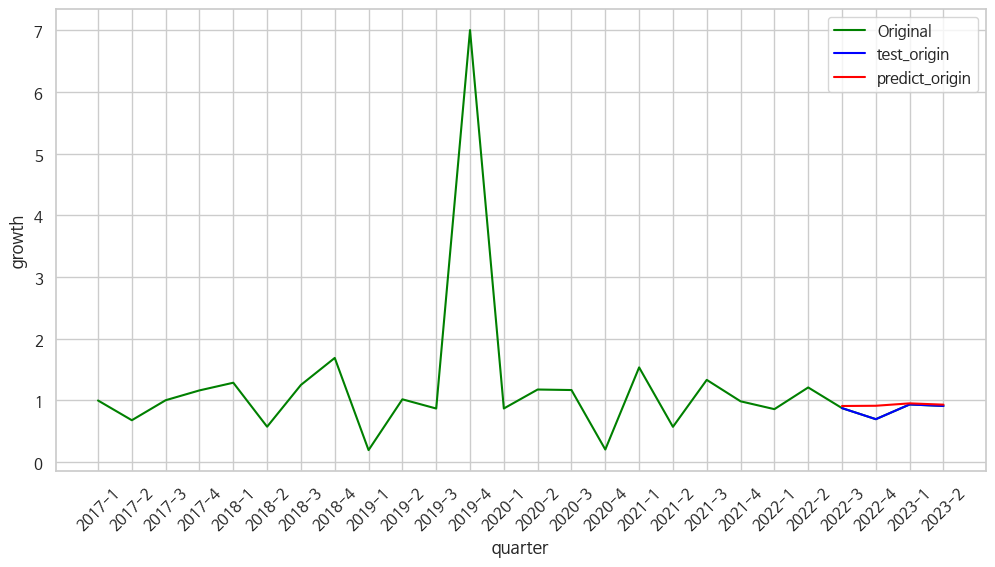

In [147]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_gagu['분기'], ap_gagu['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [148]:
### error의 요약 통계량
error.describe()

count    4.000000
mean    -0.072629
std      0.096676
min     -0.217236
25%     -0.080191
50%     -0.027719
75%     -0.020156
max     -0.017843
dtype: float64

In [149]:
### 23년 3분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 20ms/step
[[0.09630586]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.8514611721038818 


### 시장성

In [150]:
### X / y 데이터 생성
X = ap_gagu[['분기당_매출_금액', '성장성', '순점포증감률']]
y = ap_gagu.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성    순점포증감률
0   6.277321e+09  1.000000 -5.454545
1   4.269784e+09  0.680192  1.785714
2   4.288336e+09  1.004345  0.000000
3   4.989452e+09  1.163494 -3.703704
4   6.425442e+09  1.287805 -3.846154
5   3.695329e+09  0.575109 -4.000000
6   4.628162e+09  1.252436  1.960784
7   7.819604e+09  1.689570  1.923077
8   1.532978e+09  0.196043  0.000000
9   1.562245e+09  1.019092  4.166667
10  1.358902e+09  0.869839 -2.127660
11  9.514535e+09  7.001633  3.508772
12  8.281213e+09  0.870375 -1.818182
13  9.753625e+09  1.177801  0.000000
14  1.140579e+10  1.169389 -3.773585
15  2.343303e+09  0.205449  1.886792
16  3.599633e+09  1.536136 -1.923077
17  2.063794e+09  0.573335  3.703704
18  2.753136e+09  1.334017  6.818182
19  2.716606e+09  0.986732  3.389831
20  2.335130e+09  0.859576 -1.724138
21  2.828555e+09  1.211305  0.000000
22  2.478670e+09  0.876303 -1.754386
23  1.728401e+09  0.697310  0.000000
24  3.777143e+09  0.935765 -1.898082
25  3.881876e+09  0.911570 -2.361069
-

In [151]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [152]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.24069561 0.10869328 0.28978592]
 [0.25112001 0.10513815 0.25206107]]


In [153]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [154]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_21 (LSTM)              (None, 32)                12416     
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [155]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.6355
Epoch 1: val_loss improved from inf to 0.12774, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.6355 - val_loss: 0.1277
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.6340
Epoch 2: val_loss improved from 0.12774 to 0.12722, saving model to stock_model.h5
1/1 [==============================] - 0s 77ms/step - loss: 0.6340 - val_loss: 0.1272
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.6324
Epoch 3: val_loss improved from 0.12722 to 0.12671, saving model to stock_model.h5
1/1 [==============================] - 0s 91ms/step - loss: 0.6324 - val_loss: 0.1267
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.6309
Epoch 4: val_loss improved from 0.12671 to 0.12620, saving model to stock_model.h5
1/1 [==============================] - 0s 83ms/step - loss: 0.6309 - val_loss: 0.1262
Epoch 5/300
1/1 [=================

In [156]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 896ms/step
[[0.18419671]
 [0.19322547]
 [0.18115193]
 [0.18898919]]


In [157]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_gagu.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.464751,0.184197
2022-4,0.362770,0.193225
2023-1,0.262334,0.181152
2023-2,0.224343,0.188989


In [158]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_gagu.iloc[-len(pred):, 5].values       # 시장성이 ap_gagu의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.464751,0.184197,-1.609844e+08,-217505392.0,5.652096e+07
2022-4,0.362770,0.193225,-1.815298e+08,-215686432.0,3.415667e+07
2023-1,0.262334,0.181152,-2.017638e+08,-218118816.0,1.635504e+07
2023-2,0.224343,0.188989,-2.094175e+08,-216539904.0,7.122400e+06


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


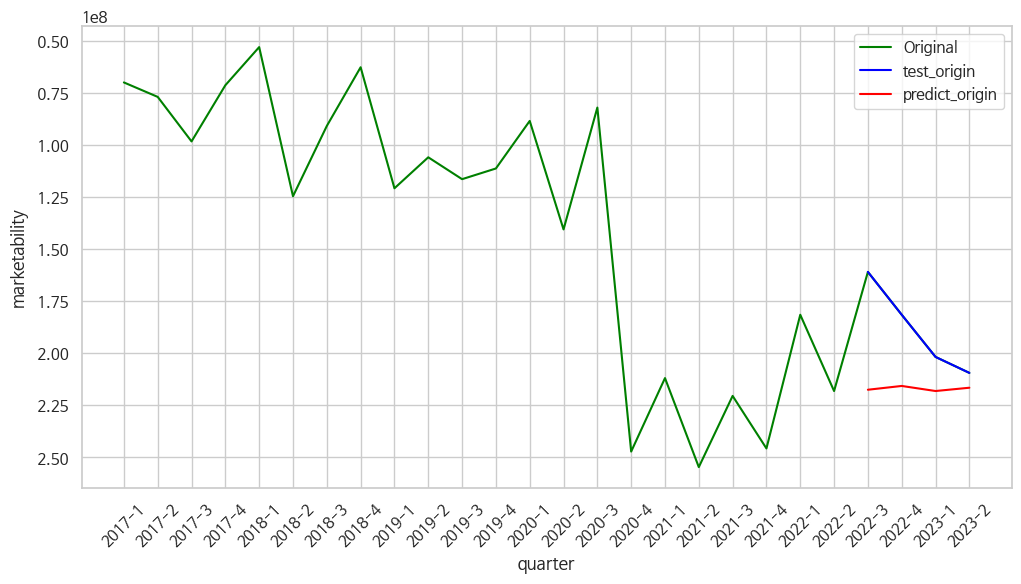

In [159]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_gagu['분기'], ap_gagu['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [160]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     2.853877e+07
std      2.176900e+07
min      7.122400e+06
25%      1.404688e+07
50%      2.525586e+07
75%      3.974774e+07
max      5.652096e+07
dtype: float64

In [161]:
### 23년 3분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 31ms/step
[[0.18379366]]
--------------------------------------------------------------------------------
예측된 시장성  : -217586592.0 


### 순점포증감률

In [162]:
### X / y 데이터 생성
X = ap_gagu[['분기당_매출_금액', '성장성', '시장성']]
y = ap_gagu.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   6.277321e+09  1.000000 -7.009935e+07
1   4.269784e+09  0.680192 -7.703522e+07
2   4.288336e+09  1.004345 -9.839173e+07
3   4.989452e+09  1.163494 -7.144215e+07
4   6.425442e+09  1.287805 -5.315206e+07
5   3.695329e+09  0.575109 -1.246837e+08
6   4.628162e+09  1.252436 -9.097976e+07
7   7.819604e+09  1.689570 -6.281442e+07
8   1.532978e+09  0.196043 -1.208744e+08
9   1.562245e+09  1.019092 -1.060086e+08
10  1.358902e+09  0.869839 -1.164994e+08
11  9.514535e+09  7.001633 -1.113737e+08
12  8.281213e+09  0.870375 -8.855938e+07
13  9.753625e+09  1.177801 -1.406001e+08
14  1.140579e+10  1.169389 -8.215074e+07
15  2.343303e+09  0.205449 -2.471592e+08
16  3.599633e+09  1.536136 -2.119174e+08
17  2.063794e+09  0.573335 -2.546140e+08
18  2.753136e+09  1.334017 -2.204614e+08
19  2.716606e+09  0.986732 -2.456652e+08
20  2.335130e+09  0.859576 -1.815395e+08
21  2.828555e+09  1.211305 -2.181266e+08
22  2.478670e+09  0.876303 -1.609844e+08
23  1.728401e+09

In [163]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [164]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.24069561 0.10869328 0.26233366]
 [0.25112001 0.10513815 0.22434273]]


In [165]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [166]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_23 (LSTM)              (None, 32)                12416     
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [167]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2381
Epoch 1: val_loss improved from inf to 0.36245, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.2381 - val_loss: 0.3624
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2371
Epoch 2: val_loss improved from 0.36245 to 0.36157, saving model to stock_model.h5
1/1 [==============================] - 0s 81ms/step - loss: 0.2371 - val_loss: 0.3616
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2360
Epoch 3: val_loss improved from 0.36157 to 0.36069, saving model to stock_model.h5
1/1 [==============================] - 0s 101ms/step - loss: 0.2360 - val_loss: 0.3607
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2349
Epoch 4: val_loss improved from 0.36069 to 0.35981, saving model to stock_model.h5
1/1 [==============================] - 0s 76ms/step - loss: 0.2349 - val_loss: 0.3598
Epoch 5/300
1/1 [================

In [168]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 623ms/step
[[0.24561009]
 [0.24192497]
 [0.27473408]
 [0.25009897]]


In [169]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_gagu.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.301494,0.245610
2022-4,0.444444,0.241925
2023-1,0.289786,0.274734
2023-2,0.252061,0.250099


In [170]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_gagu.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_gagu의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.301494,0.245610,-1.754386,-2.440240,0.685854
2022-4,0.444444,0.241925,0.000000,-2.485466,2.485466
2023-1,0.289786,0.274734,-1.898082,-2.082809,0.184727
2023-2,0.252061,0.250099,-2.361069,-2.385149,0.024080


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


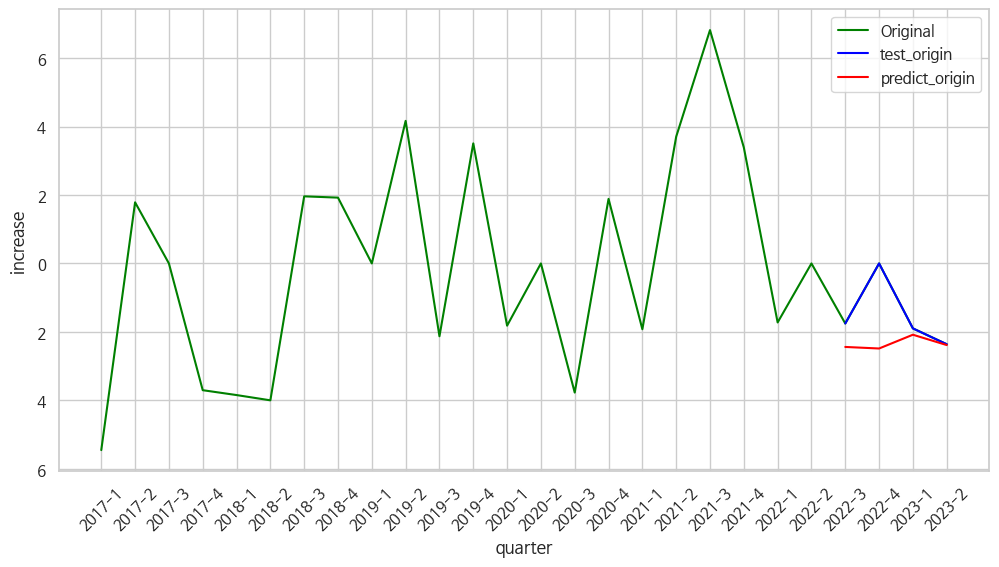

In [171]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_gagu['분기'], ap_gagu['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [172]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     0.845032
std      1.129355
min      0.024080
25%      0.144565
50%      0.435291
75%      1.135757
max      2.485466
dtype: float64

In [173]:
### 23년 3분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 22ms/step
[[0.24622397]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -2.432705879211426 


### 추가

In [174]:
ap_gagu.loc[26] = ['2023-3', '가구', sales, growth, increase, marketability]

<ipython-input-174-c6cd46345760>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_gagu.loc[26] = ['2023-3', '가구', sales, growth, increase, marketability]


In [175]:
ap_gagu

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,가구,6.277321e+09,1.000000,-5.454545,-7.009935e+07
1,2017-2,가구,4.269784e+09,0.680192,1.785714,-7.703522e+07
2,2017-3,가구,4.288336e+09,1.004345,0.000000,-9.839173e+07
3,2017-4,가구,4.989452e+09,1.163494,-3.703704,-7.144215e+07
4,2018-1,가구,6.425442e+09,1.287805,-3.846154,-5.315206e+07
5,2018-2,가구,3.695329e+09,0.575109,-4.000000,-1.246837e+08
6,2018-3,가구,4.628162e+09,1.252436,1.960784,-9.097976e+07
7,2018-4,가구,7.819604e+09,1.689570,1.923077,-6.281442e+07
8,2019-1,가구,1.532978e+09,0.196043,0.000000,-1.208744e+08
9,2019-2,가구,1.562245e+09,1.019092,4.166667,-1.060086e+08


## 23년 4분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본데이터에 추가

### 매출

In [176]:
### X / y 데이터 생성
X = ap_gagu[['성장성', '시장성', '순점포증감률']]
y = ap_gagu.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -7.009935e+07 -5.454545
1   0.680192 -7.703522e+07  1.785714
2   1.004345 -9.839173e+07  0.000000
3   1.163494 -7.144215e+07 -3.703704
4   1.287805 -5.315206e+07 -3.846154
5   0.575109 -1.246837e+08 -4.000000
6   1.252436 -9.097976e+07  1.960784
7   1.689570 -6.281442e+07  1.923077
8   0.196043 -1.208744e+08  0.000000
9   1.019092 -1.060086e+08  4.166667
10  0.869839 -1.164994e+08 -2.127660
11  7.001633 -1.113737e+08  3.508772
12  0.870375 -8.855938e+07 -1.818182
13  1.177801 -1.406001e+08  0.000000
14  1.169389 -8.215074e+07 -3.773585
15  0.205449 -2.471592e+08  1.886792
16  1.536136 -2.119174e+08 -1.923077
17  0.573335 -2.546140e+08  3.703704
18  1.334017 -2.204614e+08  6.818182
19  0.986732 -2.456652e+08  3.389831
20  0.859576 -1.815395e+08 -1.724138
21  1.211305 -2.181266e+08  0.000000
22  0.876303 -1.609844e+08 -1.754386
23  0.697310 -1.815298e+08  0.000000
24  0.935765 -2.017638e+08 -1.898082
25  0.911570 -2.094175e+08 -2.361069
2

In [177]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [178]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.10513815 0.22434273 0.25206107]
 [0.09630587 0.1837937  0.24622397]]


In [179]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [180]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_25 (LSTM)              (None, 32)                12416     
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [181]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2706
Epoch 1: val_loss improved from inf to 0.13855, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.2706 - val_loss: 0.1386
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2695
Epoch 2: val_loss improved from 0.13855 to 0.13804, saving model to stock_model.h5
1/1 [==============================] - 0s 78ms/step - loss: 0.2695 - val_loss: 0.1380
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2684
Epoch 3: val_loss improved from 0.13804 to 0.13753, saving model to stock_model.h5
1/1 [==============================] - 0s 80ms/step - loss: 0.2684 - val_loss: 0.1375
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2673
Epoch 4: val_loss improved from 0.13753 to 0.13702, saving model to stock_model.h5
1/1 [==============================] - 0s 80ms/step - loss: 0.2673 - val_loss: 0.1370
Epoch 5/300
1/1 [=================

In [182]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 628ms/step
[[0.22481376]
 [0.24166606]
 [0.2304305 ]
 [0.20680001]]


In [183]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_gagu.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.036777,0.224814
2023-1,0.240696,0.241666
2023-2,0.251120,0.230430
2023-3,0.215891,0.206800


In [184]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_gagu.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_gagu의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.036777,0.224814,1.728401e+09,3.617580e+09,-1.889179e+09
2023-1,0.240696,0.241666,3.777143e+09,3.786893e+09,-9.750016e+06
2023-2,0.251120,0.230430,3.881876e+09,3.674011e+09,2.078651e+08
2023-3,0.215891,0.206800,3.527933e+09,3.436598e+09,9.133491e+07


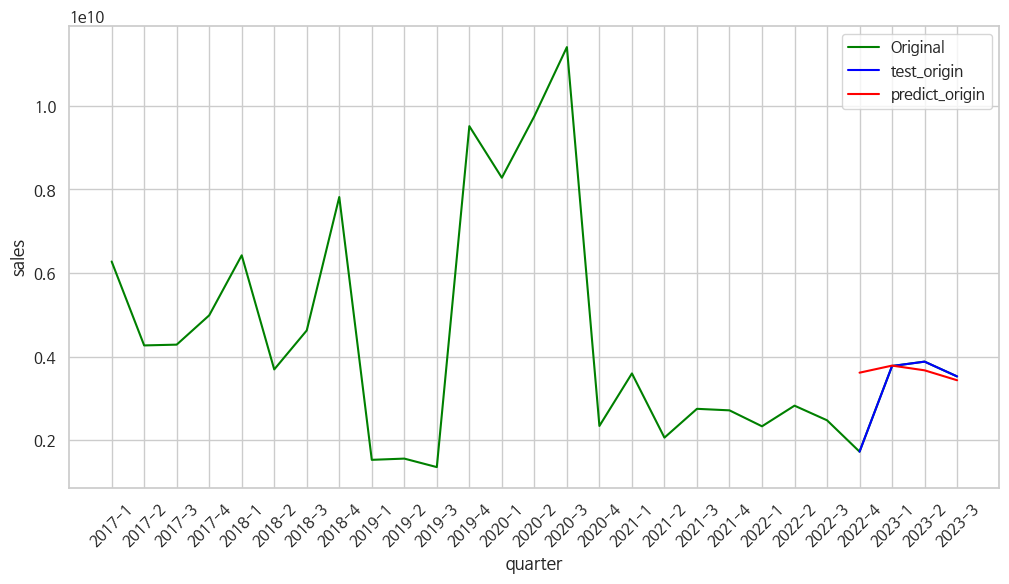

In [185]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_gagu['분기'], ap_gagu['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [186]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean    -3.999324e+08
std      9.968049e+08
min     -1.889179e+09
25%     -4.796074e+08
50%      4.079245e+07
75%      1.204675e+08
max      2.078651e+08
dtype: float64

In [187]:
### 23년 4분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 22ms/step
[[0.19780357]]
--------------------------------------------------------------------------------
예측된 매출  : 3346211584.0 


### 성장성

In [188]:
X = ap_gagu[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_gagu.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성    순점포증감률
0   6.277321e+09 -7.009935e+07 -5.454545
1   4.269784e+09 -7.703522e+07  1.785714
2   4.288336e+09 -9.839173e+07  0.000000
3   4.989452e+09 -7.144215e+07 -3.703704
4   6.425442e+09 -5.315206e+07 -3.846154
5   3.695329e+09 -1.246837e+08 -4.000000
6   4.628162e+09 -9.097976e+07  1.960784
7   7.819604e+09 -6.281442e+07  1.923077
8   1.532978e+09 -1.208744e+08  0.000000
9   1.562245e+09 -1.060086e+08  4.166667
10  1.358902e+09 -1.164994e+08 -2.127660
11  9.514535e+09 -1.113737e+08  3.508772
12  8.281213e+09 -8.855938e+07 -1.818182
13  9.753625e+09 -1.406001e+08  0.000000
14  1.140579e+10 -8.215074e+07 -3.773585
15  2.343303e+09 -2.471592e+08  1.886792
16  3.599633e+09 -2.119174e+08 -1.923077
17  2.063794e+09 -2.546140e+08  3.703704
18  2.753136e+09 -2.204614e+08  6.818182
19  2.716606e+09 -2.456652e+08  3.389831
20  2.335130e+09 -1.815395e+08 -1.724138
21  2.828555e+09 -2.181266e+08  0.000000
22  2.478670e+09 -1.609844e+08 -1.754386
23  1.728401e+09

In [189]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [190]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.25112001 0.22434273 0.25206107]
 [0.2158909  0.1837937  0.24622397]]


In [191]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [192]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_27 (LSTM)              (None, 32)                12416     
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [193]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.1150
Epoch 1: val_loss improved from inf to 0.02078, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.1150 - val_loss: 0.0208
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.1145
Epoch 2: val_loss improved from 0.02078 to 0.02051, saving model to stock_model.h5
1/1 [==============================] - 0s 106ms/step - loss: 0.1145 - val_loss: 0.0205
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.1139
Epoch 3: val_loss improved from 0.02051 to 0.02025, saving model to stock_model.h5
1/1 [==============================] - 0s 105ms/step - loss: 0.1139 - val_loss: 0.0202
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.1133
Epoch 4: val_loss improved from 0.02025 to 0.01999, saving model to stock_model.h5
1/1 [==============================] - 0s 113ms/step - loss: 0.1133 - val_loss: 0.0200
Epoch 5/300
1/1 [==============

In [194]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 901ms/step
[[0.10479676]
 [0.11046558]
 [0.10740261]
 [0.09562901]]


In [195]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_gagu.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.073655,0.104797
2023-1,0.108693,0.110466
2023-2,0.105138,0.107403
2023-3,0.096306,0.095629


In [196]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_gagu.iloc[-len(pred):, 3].values       # 성장성이 ap_gagu의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.073655,0.104797,0.697310,0.909247,-0.211937
2023-1,0.108693,0.110466,0.935765,0.947826,-0.012062
2023-2,0.105138,0.107403,0.911570,0.926981,-0.015411
2023-3,0.096306,0.095629,0.851461,0.846855,0.004606


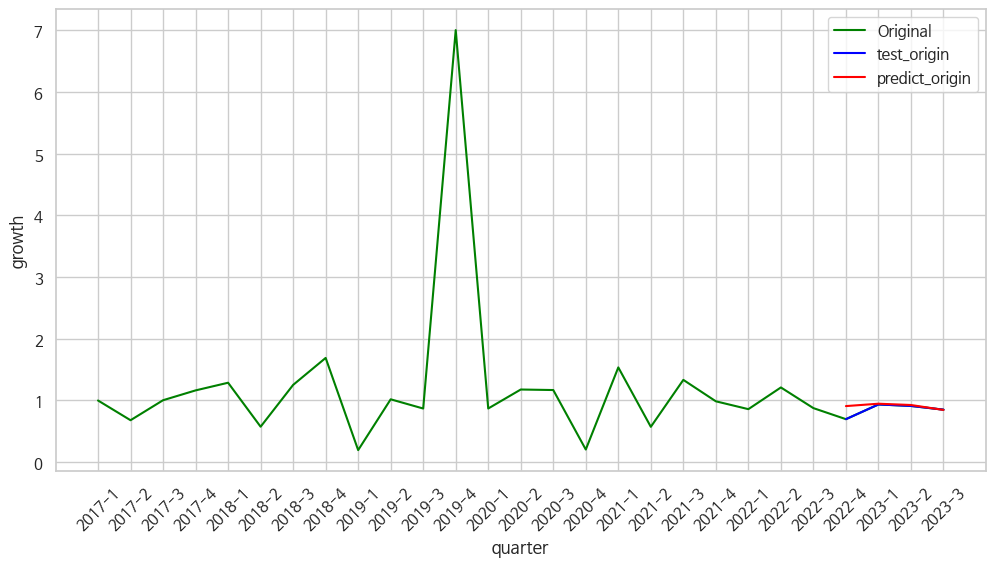

In [197]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_gagu['분기'], ap_gagu['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [198]:
### error의 요약 통계량
error.describe()

count    4.000000
mean    -0.058701
std      0.102532
min     -0.211937
25%     -0.064542
50%     -0.013736
75%     -0.007895
max      0.004606
dtype: float64

In [199]:
### 23년 4분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 34ms/step
[[0.0922844]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.8240926861763 


###시장성

In [200]:
### X / y 데이터 생성
X = ap_gagu[['분기당_매출_금액', '성장성', '순점포증감률']]
y = ap_gagu.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성    순점포증감률
0   6.277321e+09  1.000000 -5.454545
1   4.269784e+09  0.680192  1.785714
2   4.288336e+09  1.004345  0.000000
3   4.989452e+09  1.163494 -3.703704
4   6.425442e+09  1.287805 -3.846154
5   3.695329e+09  0.575109 -4.000000
6   4.628162e+09  1.252436  1.960784
7   7.819604e+09  1.689570  1.923077
8   1.532978e+09  0.196043  0.000000
9   1.562245e+09  1.019092  4.166667
10  1.358902e+09  0.869839 -2.127660
11  9.514535e+09  7.001633  3.508772
12  8.281213e+09  0.870375 -1.818182
13  9.753625e+09  1.177801  0.000000
14  1.140579e+10  1.169389 -3.773585
15  2.343303e+09  0.205449  1.886792
16  3.599633e+09  1.536136 -1.923077
17  2.063794e+09  0.573335  3.703704
18  2.753136e+09  1.334017  6.818182
19  2.716606e+09  0.986732  3.389831
20  2.335130e+09  0.859576 -1.724138
21  2.828555e+09  1.211305  0.000000
22  2.478670e+09  0.876303 -1.754386
23  1.728401e+09  0.697310  0.000000
24  3.777143e+09  0.935765 -1.898082
25  3.881876e+09  0.911570 -2.361069
2

In [201]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [202]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.25112001 0.10513815 0.25206107]
 [0.2158909  0.09630587 0.24622397]]


In [203]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [204]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_29 (LSTM)              (None, 32)                12416     
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [205]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.6355
Epoch 1: val_loss improved from inf to 0.13842, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.6355 - val_loss: 0.1384
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.6340
Epoch 2: val_loss improved from 0.13842 to 0.13788, saving model to stock_model.h5
1/1 [==============================] - 0s 88ms/step - loss: 0.6340 - val_loss: 0.1379
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.6324
Epoch 3: val_loss improved from 0.13788 to 0.13733, saving model to stock_model.h5
1/1 [==============================] - 0s 93ms/step - loss: 0.6324 - val_loss: 0.1373
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.6309
Epoch 4: val_loss improved from 0.13733 to 0.13679, saving model to stock_model.h5
1/1 [==============================] - 0s 74ms/step - loss: 0.6309 - val_loss: 0.1368
Epoch 5/300
1/1 [=================

In [206]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 612ms/step
[[0.21181032]
 [0.19806796]
 [0.2068491 ]
 [0.20140179]]


In [207]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_gagu.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.362770,0.211810
2023-1,0.262334,0.198068
2023-2,0.224343,0.206849
2023-3,0.183794,0.201402


In [208]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_gagu.iloc[-len(pred):, 5].values       # 시장성이 ap_gagu의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.362770,0.211810,-1.815298e+08,-211942304.0,3.041254e+07
2023-1,0.262334,0.198068,-2.017638e+08,-214710880.0,1.294710e+07
2023-2,0.224343,0.206849,-2.094175e+08,-212941808.0,3.524304e+06
2023-3,0.183794,0.201402,-2.175866e+08,-214039216.0,-3.547376e+06


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


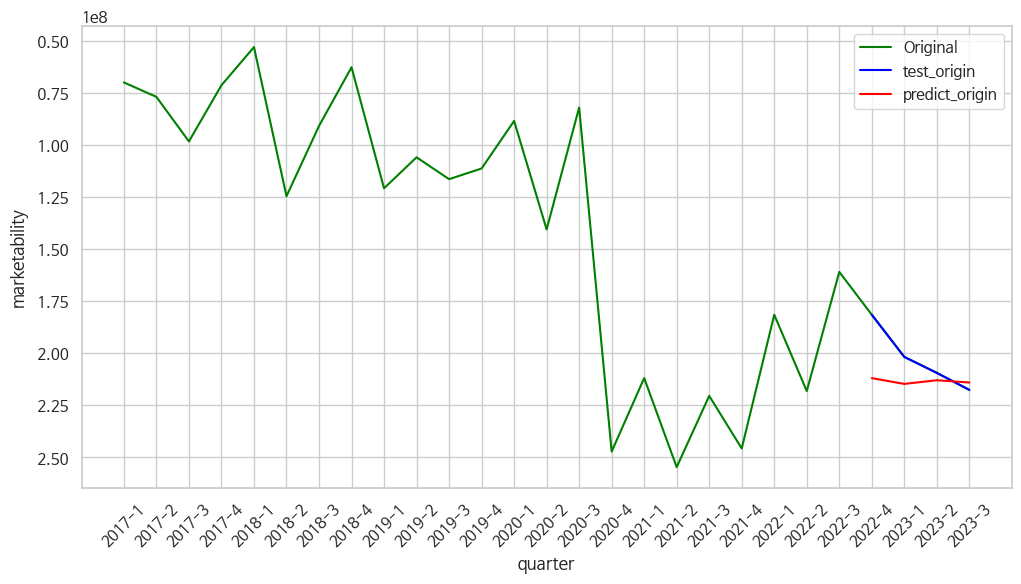

In [209]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_gagu['분기'], ap_gagu['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [210]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     1.083414e+07
std      1.469739e+07
min     -3.547376e+06
25%      1.756384e+06
50%      8.235704e+06
75%      1.731346e+07
max      3.041254e+07
dtype: float64

In [211]:
### 23년 4분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 29ms/step
[[0.19610049]]
--------------------------------------------------------------------------------
예측된 시장성  : -215107248.0 


### 순점포증감률

In [212]:
### X / y 데이터 생성
X = ap_gagu[['분기당_매출_금액', '성장성', '시장성']]
y = ap_gagu.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   6.277321e+09  1.000000 -7.009935e+07
1   4.269784e+09  0.680192 -7.703522e+07
2   4.288336e+09  1.004345 -9.839173e+07
3   4.989452e+09  1.163494 -7.144215e+07
4   6.425442e+09  1.287805 -5.315206e+07
5   3.695329e+09  0.575109 -1.246837e+08
6   4.628162e+09  1.252436 -9.097976e+07
7   7.819604e+09  1.689570 -6.281442e+07
8   1.532978e+09  0.196043 -1.208744e+08
9   1.562245e+09  1.019092 -1.060086e+08
10  1.358902e+09  0.869839 -1.164994e+08
11  9.514535e+09  7.001633 -1.113737e+08
12  8.281213e+09  0.870375 -8.855938e+07
13  9.753625e+09  1.177801 -1.406001e+08
14  1.140579e+10  1.169389 -8.215074e+07
15  2.343303e+09  0.205449 -2.471592e+08
16  3.599633e+09  1.536136 -2.119174e+08
17  2.063794e+09  0.573335 -2.546140e+08
18  2.753136e+09  1.334017 -2.204614e+08
19  2.716606e+09  0.986732 -2.456652e+08
20  2.335130e+09  0.859576 -1.815395e+08
21  2.828555e+09  1.211305 -2.181266e+08
22  2.478670e+09  0.876303 -1.609844e+08
23  1.728401e+09

In [213]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [214]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.25112001 0.10513815 0.22434273]
 [0.2158909  0.09630587 0.1837937 ]]


In [215]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [216]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_31 (LSTM)              (None, 32)                12416     
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [217]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.2381
Epoch 1: val_loss improved from inf to 0.33282, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.2381 - val_loss: 0.3328
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.2371
Epoch 2: val_loss improved from 0.33282 to 0.33199, saving model to stock_model.h5
1/1 [==============================] - 0s 75ms/step - loss: 0.2371 - val_loss: 0.3320
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.2360
Epoch 3: val_loss improved from 0.33199 to 0.33115, saving model to stock_model.h5
1/1 [==============================] - 0s 75ms/step - loss: 0.2360 - val_loss: 0.3312
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.2349
Epoch 4: val_loss improved from 0.33115 to 0.33032, saving model to stock_model.h5
1/1 [==============================] - 0s 76ms/step - loss: 0.2349 - val_loss: 0.3303
Epoch 5/300
1/1 [=================

In [218]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 660ms/step
[[0.24192497]
 [0.27473408]
 [0.25009897]
 [0.24622396]]


In [219]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_gagu.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.444444,0.241925
2023-1,0.289786,0.274734
2023-2,0.252061,0.250099
2023-3,0.246224,0.246224


In [220]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_gagu.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_gagu의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.444444,0.241925,0.000000,-2.485466,2.485466e+00
2023-1,0.289786,0.274734,-1.898082,-2.082809,1.847271e-01
2023-2,0.252061,0.250099,-2.361069,-2.385149,2.408028e-02
2023-3,0.246224,0.246224,-2.432706,-2.432706,2.384186e-07


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


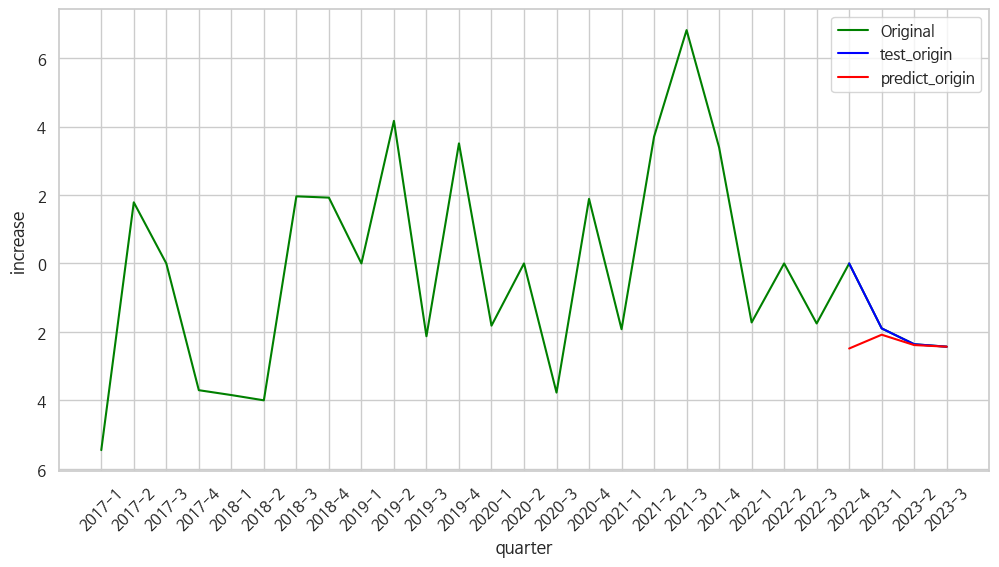

In [221]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_gagu['분기'], ap_gagu['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [222]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     6.735685e-01
std      1.210712e+00
min      2.384186e-07
25%      1.806027e-02
50%      1.044037e-01
75%      7.599119e-01
max      2.485466e+00
dtype: float64

In [223]:
### 23년 2분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 20ms/step
[[0.23597752]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -2.558457851409912 


### 추가

In [224]:
ap_gagu.loc[27] = ['2023-4', '가구', sales, growth, increase, marketability]

<ipython-input-224-10bf243c2654>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_gagu.loc[27] = ['2023-4', '가구', sales, growth, increase, marketability]


In [225]:
final_ap_gagu = ap_gagu
final_ap_gagu

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,가구,6.277321e+09,1.000000,-5.454545,-7.009935e+07
1,2017-2,가구,4.269784e+09,0.680192,1.785714,-7.703522e+07
2,2017-3,가구,4.288336e+09,1.004345,0.000000,-9.839173e+07
3,2017-4,가구,4.989452e+09,1.163494,-3.703704,-7.144215e+07
4,2018-1,가구,6.425442e+09,1.287805,-3.846154,-5.315206e+07
5,2018-2,가구,3.695329e+09,0.575109,-4.000000,-1.246837e+08
6,2018-3,가구,4.628162e+09,1.252436,1.960784,-9.097976e+07
7,2018-4,가구,7.819604e+09,1.689570,1.923077,-6.281442e+07
8,2019-1,가구,1.532978e+09,0.196043,0.000000,-1.208744e+08
9,2019-2,가구,1.562245e+09,1.019092,4.166667,-1.060086e+08


## 최종결과

In [226]:
### X / y 데이터 생성
X = ap_gagu[['성장성', '시장성', '순점포증감률']]
y = ap_gagu.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성    순점포증감률
0   1.000000 -7.009935e+07 -5.454545
1   0.680192 -7.703522e+07  1.785714
2   1.004345 -9.839173e+07  0.000000
3   1.163494 -7.144215e+07 -3.703704
4   1.287805 -5.315206e+07 -3.846154
5   0.575109 -1.246837e+08 -4.000000
6   1.252436 -9.097976e+07  1.960784
7   1.689570 -6.281442e+07  1.923077
8   0.196043 -1.208744e+08  0.000000
9   1.019092 -1.060086e+08  4.166667
10  0.869839 -1.164994e+08 -2.127660
11  7.001633 -1.113737e+08  3.508772
12  0.870375 -8.855938e+07 -1.818182
13  1.177801 -1.406001e+08  0.000000
14  1.169389 -8.215074e+07 -3.773585
15  0.205449 -2.471592e+08  1.886792
16  1.536136 -2.119174e+08 -1.923077
17  0.573335 -2.546140e+08  3.703704
18  1.334017 -2.204614e+08  6.818182
19  0.986732 -2.456652e+08  3.389831
20  0.859576 -1.815395e+08 -1.724138
21  1.211305 -2.181266e+08  0.000000
22  0.876303 -1.609844e+08 -1.754386
23  0.697310 -1.815298e+08  0.000000
24  0.935765 -2.017638e+08 -1.898082
25  0.911570 -2.094175e+08 -2.361069
2

In [227]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (28, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (28, 1)


In [228]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (26, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (26, 1)
[[0.09630587 0.1837937  0.24622397]
 [0.0922844  0.19610046 0.23597751]]


In [229]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (22, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (22, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [230]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer = Adam(learning_rate = 0.0001))

# 모델 확인
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_33 (LSTM)              (None, 32)                12416     
                                                                 
 dense_16 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [231]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    # batch_size=256,
                    epochs=300,
                    validation_split=0.4,
                    callbacks=[early_stop, checkpoint])

Epoch 1/300
1/1 [==============================] - ETA: 0s - loss: 0.3319
Epoch 1: val_loss improved from inf to 0.02041, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.3319 - val_loss: 0.0204
Epoch 2/300
1/1 [==============================] - ETA: 0s - loss: 0.3307
Epoch 2: val_loss improved from 0.02041 to 0.02016, saving model to stock_model.h5
1/1 [==============================] - 0s 103ms/step - loss: 0.3307 - val_loss: 0.0202
Epoch 3/300
1/1 [==============================] - ETA: 0s - loss: 0.3295
Epoch 3: val_loss improved from 0.02016 to 0.01991, saving model to stock_model.h5
1/1 [==============================] - 0s 91ms/step - loss: 0.3295 - val_loss: 0.0199
Epoch 4/300
1/1 [==============================] - ETA: 0s - loss: 0.3284
Epoch 4: val_loss improved from 0.01991 to 0.01966, saving model to stock_model.h5
1/1 [==============================] - 0s 113ms/step - loss: 0.3284 - val_loss: 0.0197
Epoch 5/300
1/1 [===============

In [232]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 766ms/step
[[0.11997464]
 [0.11525701]
 [0.1051058 ]
 [0.10142943]]


In [233]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_gagu.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2023-1,0.240696,0.119975
2023-2,0.251120,0.115257
2023-3,0.215891,0.105106
2023-4,0.197804,0.101429


In [234]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_gagu.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_gagu의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2023-1,0.240696,0.119975,3.777143e+09,2.564274e+09,1.212869e+09
2023-2,0.251120,0.115257,3.881876e+09,2.516876e+09,1.365000e+09
2023-3,0.215891,0.105106,3.527933e+09,2.414888e+09,1.113045e+09
2023-4,0.197804,0.101429,3.346212e+09,2.377952e+09,9.682596e+08


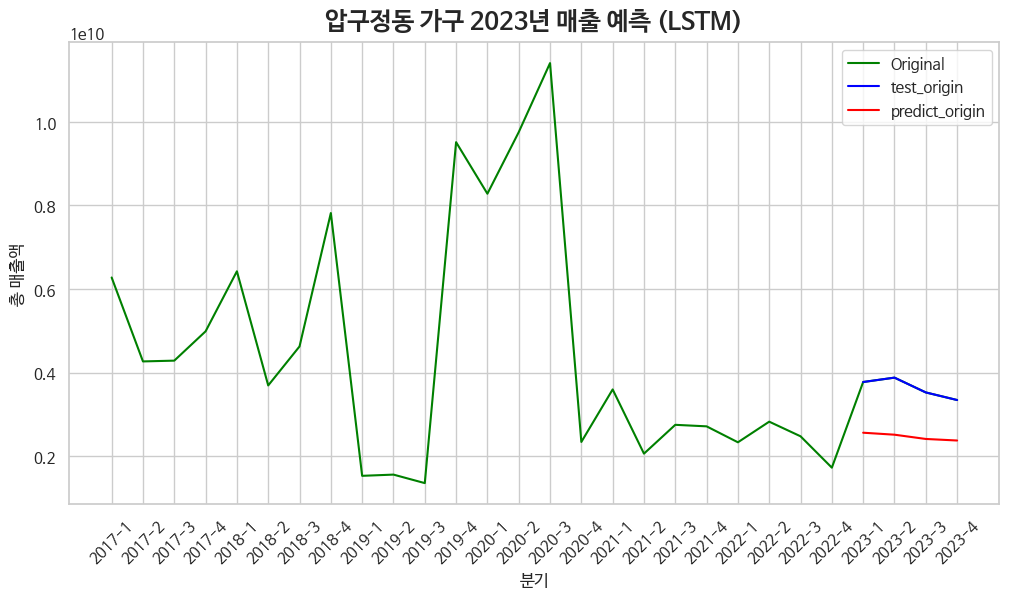

In [235]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.title('압구정동 가구 2023년 매출 예측 (LSTM)', fontsize = 18, fontweight='bold', pad =10)


plt.plot(ap_gagu['분기'], ap_gagu['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('분기')
plt.ylabel('총 매출액')
plt.legend()
plt.show()